In [1]:
import torch
from torch import nn
import torch.utils.data as Data
import torch.optim as optim
import numpy as np
from os.path import join as PJ
import matplotlib.pyplot as plt 

In [2]:
from torch.utils.data import Dataset
from torchvision import transforms
from PIL import Image,ImageOps

In [3]:
import tensorflow as tf

In [5]:
def LoadFiles(mode="train"):
    if mode == "train":
        with open(TrainFile, 'r') as trainf:
            image_info = trainf.readlines()
            image_info = [path.strip().split() for path in image_info]
            image_info = np.asarray(image_info)

            # Split to image path and label
            image_paths = image_info[:, 0]
            label_ids = image_info[:, 1].astype(int)

#             labels = tf.one_hot(label_ids, num_class, dtype=tf.int32)
            print("in Load : ", label_ids.shape)
            return image_paths, label_ids
    else:
        with open(TestFile, 'r') as testf:
            image_info = testf.readlines()
            image_info = [path.strip().split() for path in image_info]
            image_info = np.asarray(image_info)

            # Split to image path and label
            image_paths = image_info[:, 0]
            label_ids = image_info[:, 1].astype(int)
#             labels = tf.one_hot(label_ids, num_class, dtype=tf.int32)
            return image_paths, label_ids

In [6]:
import cv2
class TermiteDataset(Dataset):
    def __init__(self, data_file, transform):
        with open(data_file, 'r') as f:
            image_info = f.readlines()
        image_info = [path.strip().split() for path in image_info]
        image_info = np.asarray(image_info)

        # Split to image path and label
        self.image_paths = image_info[:, 0]
        self.label_ids = image_info[:, 1].astype(int)
        self.transform = transform
        
    def __len__(self):
        return len(self.image_paths)

    def __getitem__(self, idx):
#         print(idx, self.label_ids.shape, self.label_ids[idx])
        label = self.label_ids[idx]
        image_path = self.image_paths[idx]
        original_image = Image.open(image_path).convert('RGB')
        
#         print(original_image.size)
        
        if original_image.size[0] > 1000:
            original_image = original_image.resize((1000, original_image.size[1]*1000//original_image.size[0]))
        elif original_image.size[1] > 1000:
            original_image = original_image.resize((original_image.size[0]*1000//original_image.size[1], 1000))
#         print(original_image.shape)
        left = 500-original_image.size[0]//2
        right = 500-original_image.size[0]//2
        top = 500-original_image.size[1]//2
        bottom = 500-original_image.size[1]//2
        
        if left + right + original_image.size[0] != 1000:
            right = 1000 - left - original_image.size[0]
        if top + bottom + original_image.size[1] != 1000:
            top = 1000 - bottom - original_image.size[1]
        
#         original_image= cv2.copyMakeBorder(original_image,left,right,top,bottom,cv2.BORDER_CONSTANT,value=(0, 0, 0))
        original_image = ImageOps.expand(original_image, border=(left,top,right,bottom), fill=0)##left,top,right,bottom
        original_image = original_image.resize((130,130))
        transform1 = transforms.Compose([transforms.ToTensor()])
        original_image = transform1(original_image)
#         print(original_image.shape)
        
        
#         original_image = self.transform(original_image)
#         original_image.permute(2,0,1)
#         print(original_image.shape, answer.shape)
        return label, original_image, self.image_paths[idx]

def transform_set(train, new_size=None, pad=None):
    """
    train: True or False
    new_size: int or tuple
    
    """
#     transform_list = [transforms.ToTensor(),
#                       transforms.Normalize([0.5, 0.5, 0.5], [0.5, 0.5, 0.5])]
    transform_list = [transforms.ToTensor()]
    # replace centercrop to padding
#     transform_list = [transforms.CenterCrop((crop_h, crop_w))] + transform_list if crop else transform_list
#     transform_list = [transforms.Resize(new_size)] + transform_list if new_size is not None else transform_list

#     transform_list = [transforms.RandomHorizontalFlip()] + transform_list if train else transform_list
    transform = transforms.Compose(transform_list)
    return transform

In [7]:
def CheckFile(filename):
    with open(filename, 'r') as f:
            image_info = f.readlines()
    image_info = [path.strip().split() for path in image_info]
    image_info = np.asarray(image_info)
    counts = {"台灣土白蟻兵蟻" : 0,
             "台灣土白蟻工蟻" : 0,
             "台灣家白蟻兵蟻" : 0,
             "台灣家白蟻工蟻" : 0,
             "截頭堆沙兵蟻" : 0,
             "截頭堆沙工蟻" : 0,
             "黃肢散工蟻" : 0,
             "黃肢散兵蟻" : 0,
             "背景": 0}
        
    Locations = {"L1" : 0,
             "L2" : 0,
             "L3" : 0}
    for line in image_info:
        path = line[0]
        if "L1" in path:
            Locations["L1"] += 1
        if "L2" in path:
            Locations["L2"] += 1
        if "L3" in path:
            Locations["L3"] += 1
        if "台灣土白蟻兵蟻" in path:
            counts["台灣土白蟻兵蟻"] += 1
        if "台灣土白蟻工蟻" in path:
            counts["台灣土白蟻工蟻"] += 1
        if "台灣家白蟻兵蟻" in path:
            counts["台灣家白蟻兵蟻"] += 1
        if "台灣家白蟻工蟻" in path:
            counts["台灣家白蟻工蟻"] += 1
        if "截頭堆沙兵蟻" in path:
            counts["截頭堆沙兵蟻"] += 1
        if "截頭堆沙工蟻" in path:
            counts["截頭堆沙工蟻"] += 1
        if "黃肢散兵蟻" in path:
            counts["黃肢散兵蟻"] += 1
        if "黃肢散工蟻" in path:
            counts["黃肢散工蟻"] += 1
        if "背景" in path:
            counts["背景"] += 1
    print(Locations, counts)

In [12]:
BATCH_SIZE = 64
EPOCH = 100
LearningRate = 0.0001
Momentum = 0.9
TrainFile = "/home/ytliu/Termite-Bonnie/PAPER_termite/BENCHMARK-LARGE_Ind_trainfile_1.txt"
ValFile = "/home/ytliu/Termite-Bonnie/PAPER_termite/BENCHMARK-LARGE_Ind_valfile_1.txt"
TestFile = "/home/ytliu/Termite-Bonnie/PAPER_termite/BENCHMARK-LARGE_Ind_testfile_1.txt"
# classes = ["O. formosanus Army","O. formosanus Worker", "C. formosanus Army","C. formosanus Worker", "C. domesticus Army","C. domesticus Worker", "R. flaviceps Worker", "R. flaviceps Army"]
classes = ["O.f Soldier","O.f Worker", "C.f Soldier","C.f Worker", "C.d Soldier","C.d Worker", "R.f Soldier", "R.f Worker"]
model_directory = "/home/ytliu/Termite-Bonnie/PAPER_termite/*BENCH_test_time2/"
testresult_directory = "/home/ytliu/Termite-Bonnie/PAPER_termite/*BENCH_test_time2/"

In [13]:
print("TrainFile : ", TrainFile)
print("ValidationFile : ", ValFile)
print("TestFile : ", TestFile)
CheckFile(TrainFile)
CheckFile(ValFile)
CheckFile(TestFile)

TrainFile :  /home/ytliu/Termite-Bonnie/PAPER_termite/BENCHMARK-LARGE_Ind_trainfile_L23.txt
ValidationFile :  /home/ytliu/Termite-Bonnie/PAPER_termite/BENCHMARK-LARGE_Ind_valfile_L23.txt
TestFile :  /home/ytliu/Termite-Bonnie/PAPER_termite/BENCHMARK-LARGE_Ind_testfile_L23_CFselected.txt
{'L1': 0, 'L2': 6400, 'L3': 6400} {'台灣土白蟻兵蟻': 1600, '台灣土白蟻工蟻': 1600, '台灣家白蟻兵蟻': 1600, '台灣家白蟻工蟻': 1600, '截頭堆沙兵蟻': 1600, '截頭堆沙工蟻': 1600, '黃肢散工蟻': 1600, '黃肢散兵蟻': 1600, '背景': 0}
{'L1': 0, 'L2': 1600, 'L3': 1600} {'台灣土白蟻兵蟻': 400, '台灣土白蟻工蟻': 400, '台灣家白蟻兵蟻': 400, '台灣家白蟻工蟻': 400, '截頭堆沙兵蟻': 400, '截頭堆沙工蟻': 400, '黃肢散工蟻': 400, '黃肢散兵蟻': 400, '背景': 0}
{'L1': 8000, 'L2': 0, 'L3': 0} {'台灣土白蟻兵蟻': 1000, '台灣土白蟻工蟻': 1000, '台灣家白蟻兵蟻': 1000, '台灣家白蟻工蟻': 1000, '截頭堆沙兵蟻': 1000, '截頭堆沙工蟻': 1000, '黃肢散工蟻': 1000, '黃肢散兵蟻': 1000, '背景': 0}


In [14]:
import torchvision.models as models
import os
# from MobileNetV2 import MobileNetV2
print(torch.__version__)
torch.cuda.set_device(0)
print(torch.cuda.current_device())
# mobilenet =  MobileNetV2(n_class=len(classes)).cuda()
mobilenet =  nn.Sequential(models.mobilenet_v2(pretrained=True), nn.Linear(1000, len(classes))).cuda()

1.3.0
0


In [15]:
model = mobilenet
# model = MobileNet(len(classes))
# model.to(cuda)
# model = model.cuda()
model = model
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(model.parameters(), lr=LearningRate, momentum=Momentum)

In [16]:
transform = transform_set(train=True)
trainset = TermiteDataset(TrainFile, transform)
trainloader = Data.DataLoader(
    dataset=trainset,      # torch TensorDataset format
    batch_size=BATCH_SIZE,      # mini batch size
    shuffle=True,               # 要不要打乱数据 (打乱比较好)
    num_workers=0,              # 多线程来读数据
)

In [17]:
transform2 = transform_set(train=False)
valset = TermiteDataset(ValFile, transform2)
valloader = Data.DataLoader(
    dataset=valset,      # torch TensorDataset format
    batch_size=BATCH_SIZE,      # mini batch size
    shuffle=True,               # 要不要打乱数据 (打乱比较好)
    num_workers=0,              # 多线程来读数据
)

In [18]:
# for labels, images in loader:
#     print(labels.shape)
#     print(images.shape)
#     ssssss

# TRAIN
### 
### validation

Train
[1, 00020] loss: 41.515 acc: 0.286
[1, 00040] loss: 62.967 acc: 0.466
[1, 00060] loss: 76.545 acc: 0.570
[1, 00080] loss: 86.364 acc: 0.637
[1, 00100] loss: 94.273 acc: 0.683
[1, 00120] loss: 101.660 acc: 0.715
[1, 00140] loss: 108.323 acc: 0.740
[1, 00160] loss: 114.308 acc: 0.759
[1, 00180] loss: 119.497 acc: 0.777
[1, 00200] loss: 124.476 acc: 0.791
[0.791328125]
[124.47590339183807]


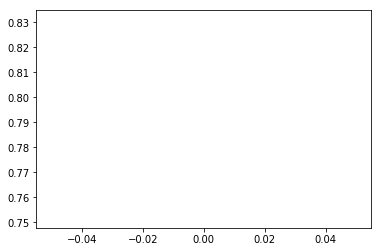

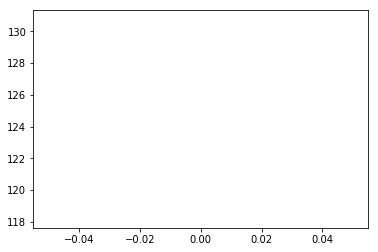

Validation
[0.9253125]
[11.312160909175873]


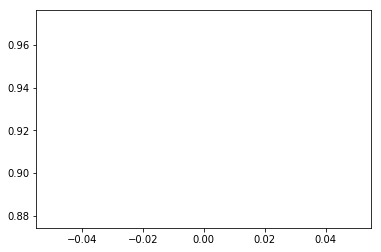

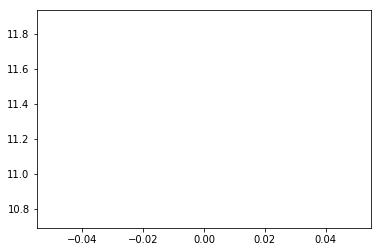


[1] accuracy: 0.925 loss: 11.312

runtime :  133.7136836051941
Train
[2, 00020] loss: 3.835 acc: 0.944
[2, 00040] loss: 7.714 acc: 0.942
[2, 00060] loss: 11.204 acc: 0.945
[2, 00080] loss: 14.240 acc: 0.949
[2, 00100] loss: 17.104 acc: 0.950
[2, 00120] loss: 20.140 acc: 0.949
[2, 00140] loss: 23.169 acc: 0.949
[2, 00160] loss: 25.631 acc: 0.951
[2, 00180] loss: 28.438 acc: 0.951
[2, 00200] loss: 30.943 acc: 0.951
[0.791328125, 0.9509375]
[124.47590339183807, 30.94254022464156]


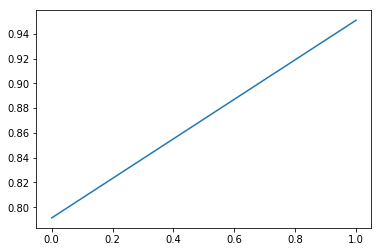

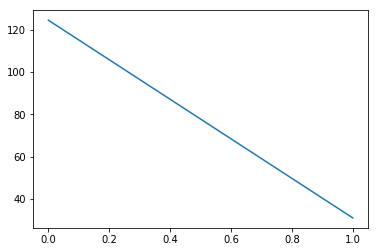

Validation
[0.9253125, 0.9540625]
[11.312160909175873, 6.511575143784285]


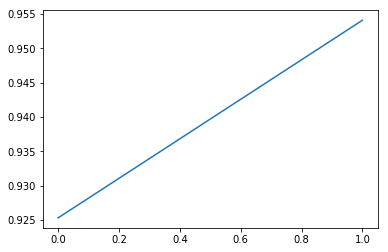

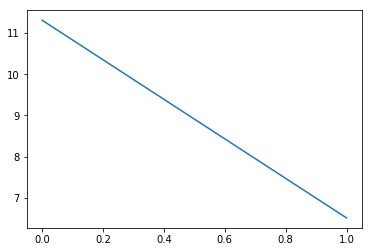


[2] accuracy: 0.954 loss: 6.512

runtime :  261.0814621448517
Train
[3, 00020] loss: 1.819 acc: 0.974
[3, 00040] loss: 3.706 acc: 0.971
[3, 00060] loss: 5.437 acc: 0.972
[3, 00080] loss: 7.116 acc: 0.973
[3, 00100] loss: 8.896 acc: 0.975
[3, 00120] loss: 10.553 acc: 0.975
[3, 00140] loss: 12.081 acc: 0.976
[3, 00160] loss: 13.663 acc: 0.977
[3, 00180] loss: 15.180 acc: 0.977
[3, 00200] loss: 16.763 acc: 0.977
[0.791328125, 0.9509375, 0.9771875]
[124.47590339183807, 30.94254022464156, 16.76276320591569]


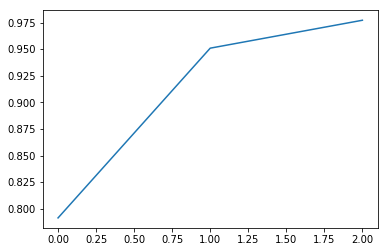

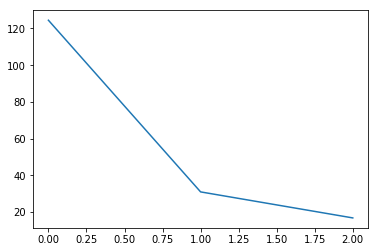

Validation
[0.9253125, 0.9540625, 0.970625]
[11.312160909175873, 6.511575143784285, 4.552704684436321]


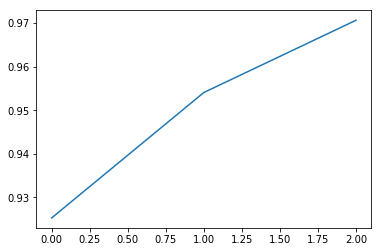

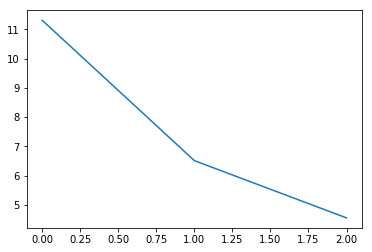


[3] accuracy: 0.971 loss: 4.553

runtime :  388.9211504459381
Train
[4, 00020] loss: 1.325 acc: 0.981
[4, 00040] loss: 2.345 acc: 0.985
[4, 00060] loss: 3.337 acc: 0.986
[4, 00080] loss: 4.384 acc: 0.987
[4, 00100] loss: 5.554 acc: 0.986
[4, 00120] loss: 6.865 acc: 0.985


In [ ]:
train_acc = []
train_loss = []
val_acc = []
val_loss = []
import time
start_time = time.time()
for epoch in range(EPOCH):
    print("Train")
    total = 0
    correct = 0
    running_loss = 0.0
    for step, (labels, images,_) in enumerate(trainloader):
        optimizer.zero_grad()
#         print("in Train: ", images.shape, labels.shape)
#         images = images.detach()
#         labels = labels.detach()
        images = images.detach().cuda()
        labels = labels.detach().cuda()
        outputs = model(images)
        
        # loss
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        running_loss += loss.item()
        
        # accuracy
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()
        acc = correct / total

        if step % 20 == 19:    # print every 2000 mini-batches
            print('[%d, %05d] loss: %.3f acc: %.3f' %
                  (epoch + 1, step + 1, running_loss, acc))

    train_acc.append(acc)
    train_loss.append(running_loss)
    print(train_acc)
    print(train_loss)
    plt.figure()
    plt.plot(range(0,epoch+1), train_acc)
    plt.savefig(model_directory + "train_acc_E%03d.jpg" % (epoch+1), dpi=500)
    plt.show()
    plt.figure()
    plt.plot(range(0,epoch+1), train_loss)
    plt.savefig(model_directory + "train_loss_E%03d.jpg" % (epoch+1), dpi=500)
    plt.show()
    
    # Evaluate validation set
    print("Validation")
    total = 0
    correct = 0
    running_loss = 0.0
    for step, (labels, images,_) in enumerate(valloader):
        optimizer.zero_grad()
        images = images.detach().cuda()
        labels = labels.detach().cuda()
#         images = images.detach()
#         labels = labels.detach()
        outputs = model(images)
        loss = criterion(outputs, labels)
        _, predicted = torch.max(outputs.data, 1)
        running_loss += loss.item()
        total += labels.size(0)
        correct += (predicted == labels).sum().item()
        acc = correct / total
    
    val_acc.append(acc)
    val_loss.append(running_loss)
    print(val_acc)
    print(val_loss)
    plt.figure()
    plt.plot(range(0,epoch+1), val_acc)
    plt.savefig(model_directory + "val_acc_E%03d.jpg" % (epoch+1), dpi=500)
    plt.show()
    plt.figure()
    plt.plot(range(0,epoch+1), val_loss)
    plt.savefig(model_directory + "val_loss_E%03d.jpg" % (epoch+1), dpi=500)
    plt.show()
    
    print('\n[%d] accuracy: %.3f loss: %.3f\n' % (epoch + 1, acc, running_loss))
    running_loss = 0.0
    # Saving model
    model_path = PJ(model_directory, "%03d_weights.pt" % (epoch+1))
    torch.save(model.state_dict(), model_path)
    runtime = time.time() - start_time
    print("runtime : ", runtime)

In [11]:
print("runtime : ", runtime)
resultfile = open(model_directory+"train_results.txt", "a")
resultfile.write("train")
resultfile.write(str(train_acc))
resultfile.write("\n")
resultfile.write(str(train_loss))
resultfile.write("\n")
resultfile.write("validation")
resultfile.write("\n")
resultfile.write(str(val_acc))
resultfile.write("\n")
resultfile.write(str(val_loss))
resultfile.write("\n")
resultfile.close()

NameError: name 'runtime' is not defined

# TEST
### evaluate
### test every model
### saliency map

In [34]:
transform = transform_set(train=False)
testset = TermiteDataset(TestFile, transform)
testloader = Data.DataLoader(
    dataset=testset,      # torch TensorDataset format
    batch_size=BATCH_SIZE,      # mini batch size
    shuffle=True,               # 要不要打乱数据 (打乱比较好)
    num_workers=0,              # 多线程来读数据
)


[1] accuracy: 0.798 loss: 68.823



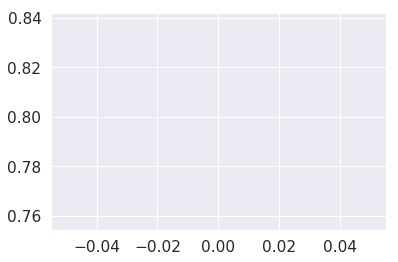

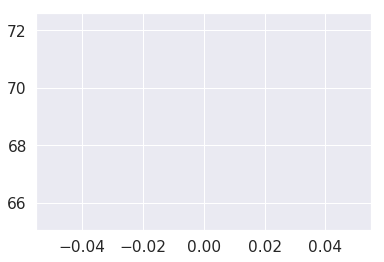

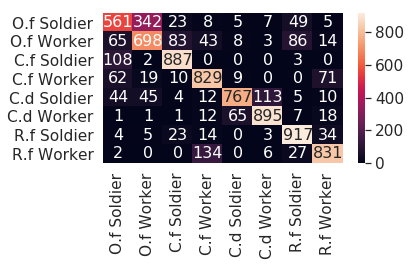

runtime :  243.6137969493866

[2] accuracy: 0.842 loss: 55.067



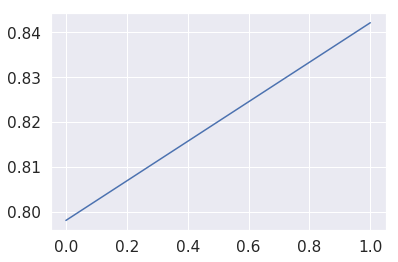

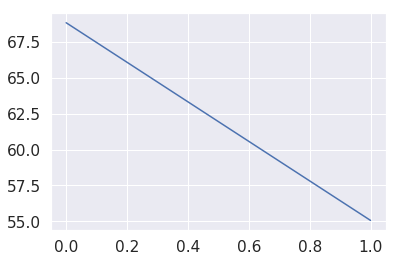

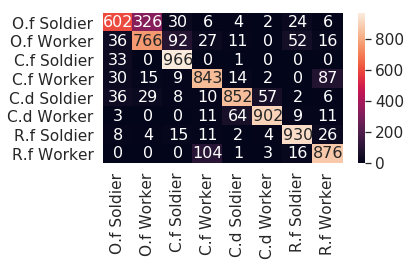

runtime :  487.88761830329895

[3] accuracy: 0.855 loss: 51.462



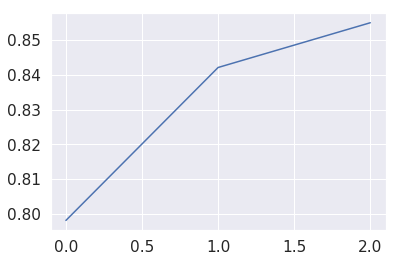

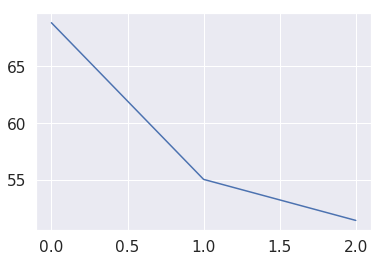

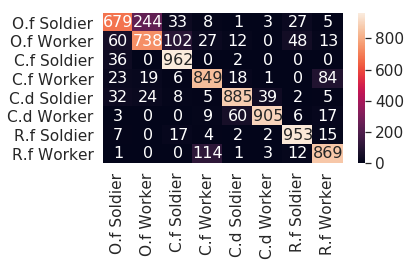

runtime :  730.1322650909424

[4] accuracy: 0.869 loss: 47.381



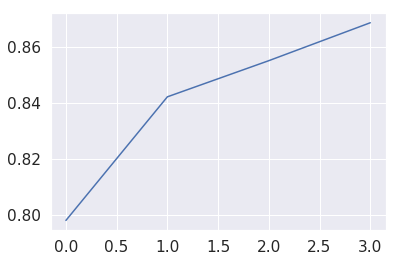

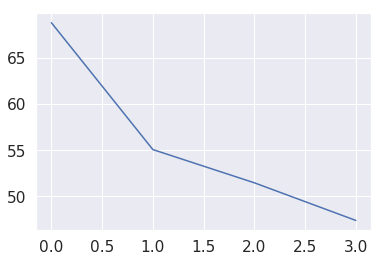

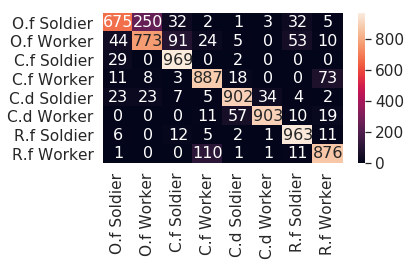

runtime :  970.2529001235962

[5] accuracy: 0.879 loss: 45.246



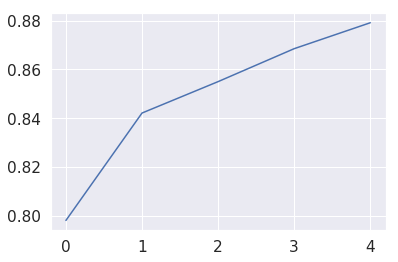

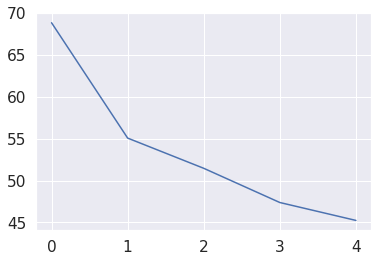

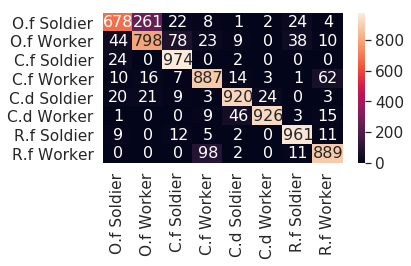

runtime :  1212.3213753700256

[6] accuracy: 0.883 loss: 42.409



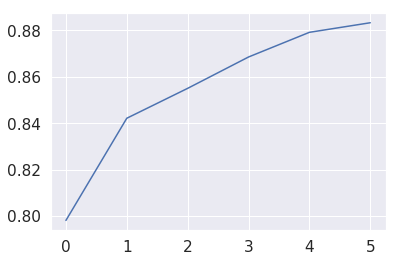

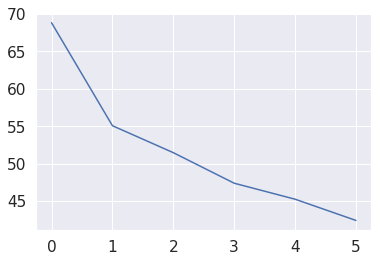

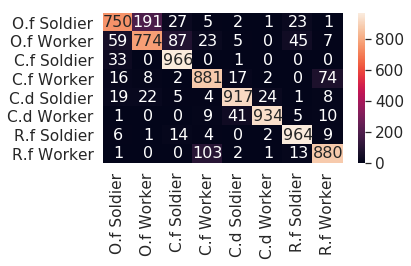

runtime :  1453.9677085876465

[7] accuracy: 0.887 loss: 42.439



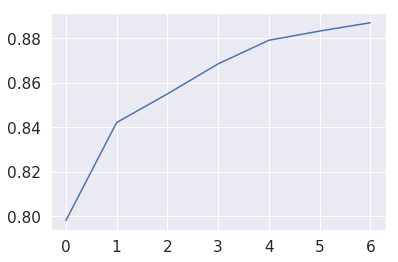

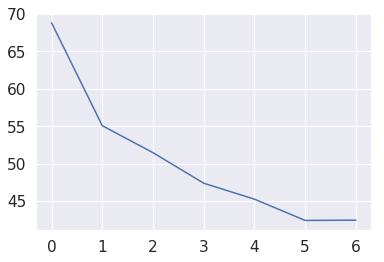

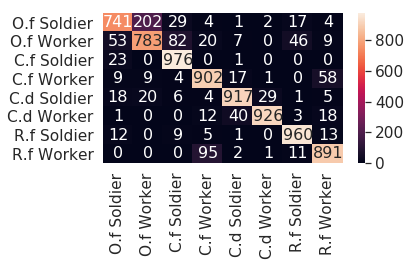

runtime :  1697.5710186958313

[8] accuracy: 0.894 loss: 40.699



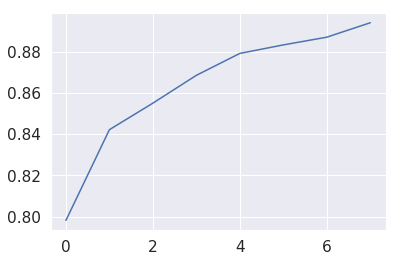

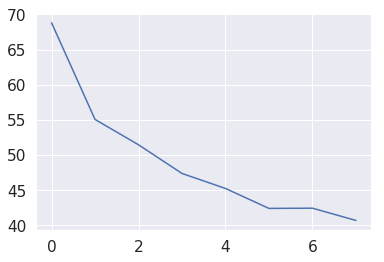

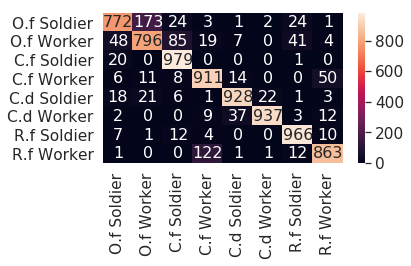

runtime :  1938.7414305210114

[9] accuracy: 0.892 loss: 40.536



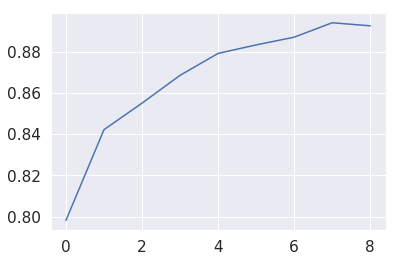

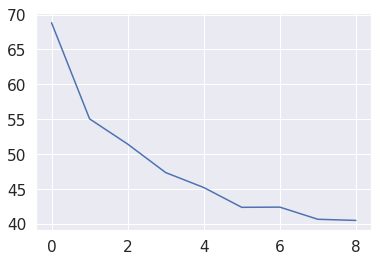

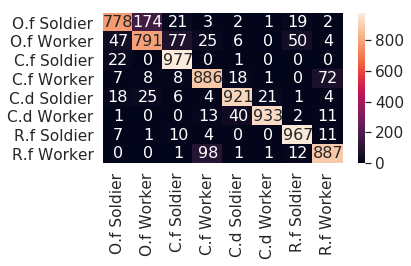

runtime :  2182.0656957626343

[10] accuracy: 0.899 loss: 40.514



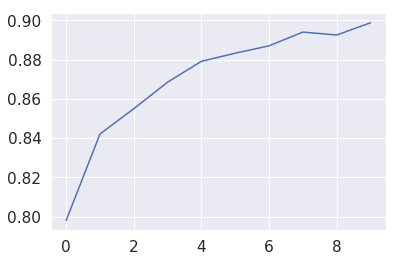

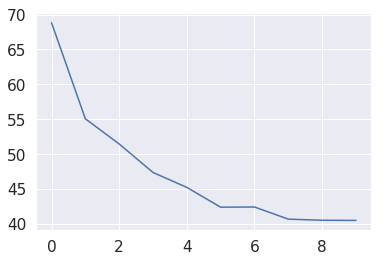

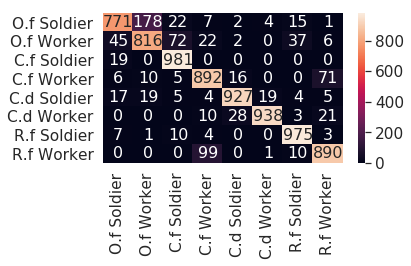

runtime :  2423.8330216407776

[11] accuracy: 0.894 loss: 40.661



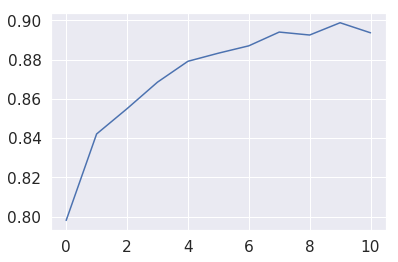

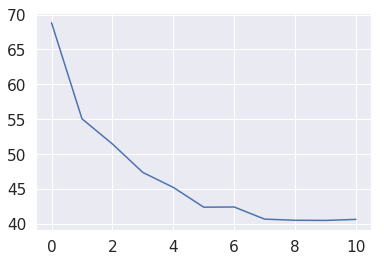

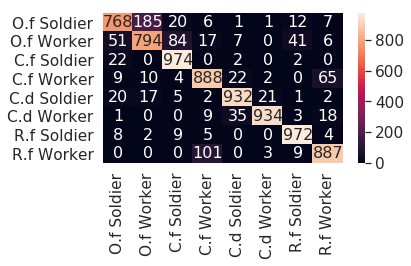

runtime :  2665.2785124778748

[12] accuracy: 0.904 loss: 39.931



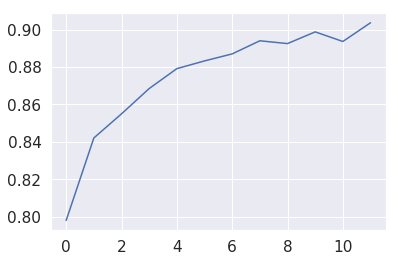

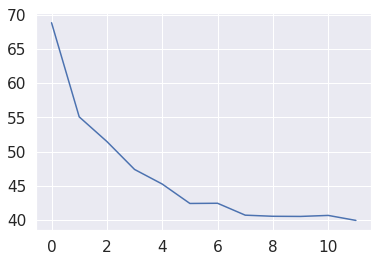

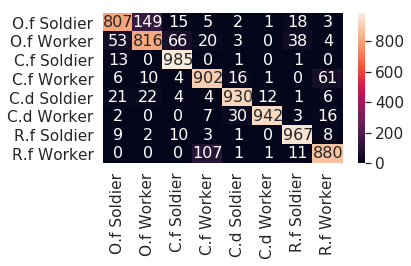

runtime :  2905.6284675598145

[13] accuracy: 0.904 loss: 38.697



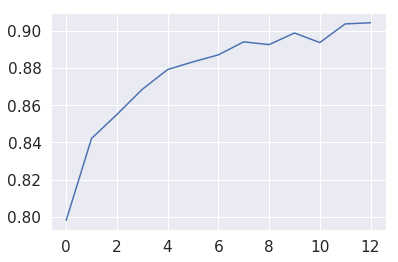

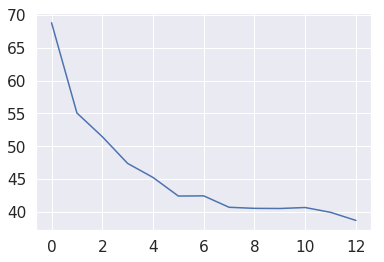

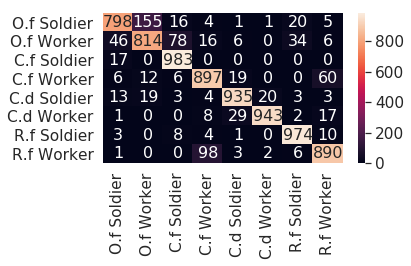

runtime :  3149.835273504257

[14] accuracy: 0.901 loss: 40.288



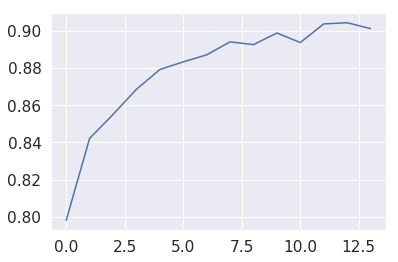

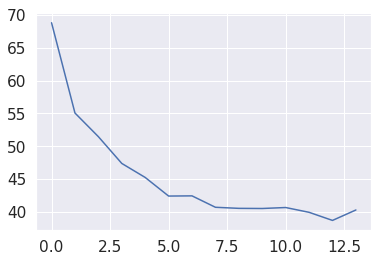

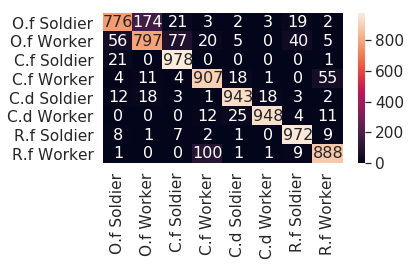

runtime :  3390.5947012901306

[15] accuracy: 0.901 loss: 39.961



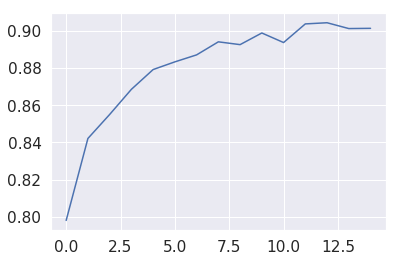

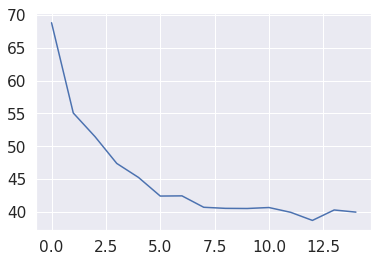

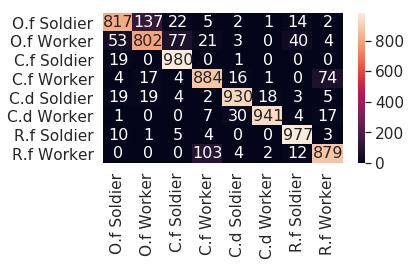

runtime :  3632.128180503845

[16] accuracy: 0.905 loss: 38.691



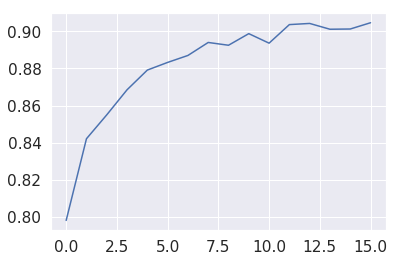

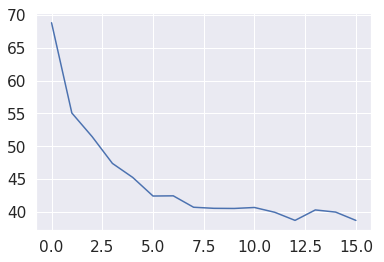

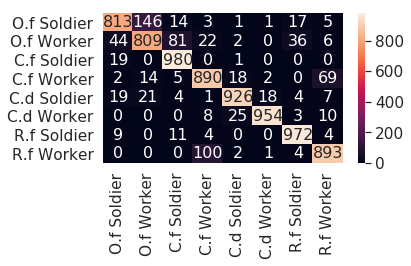

runtime :  3872.4076862335205

[17] accuracy: 0.903 loss: 39.694



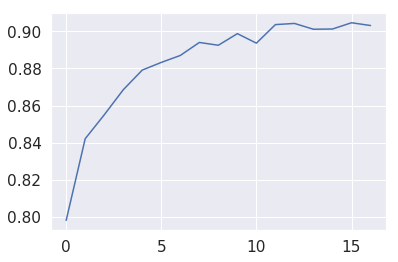

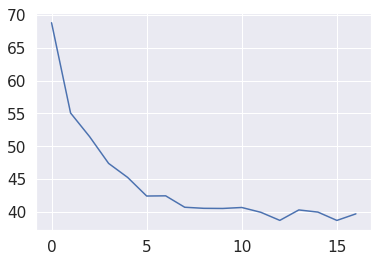

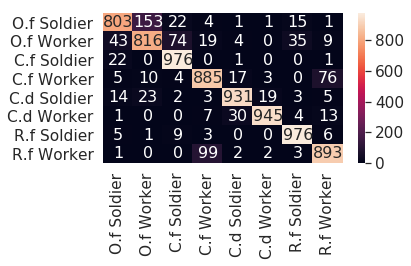

runtime :  4114.361569404602

[18] accuracy: 0.905 loss: 39.297



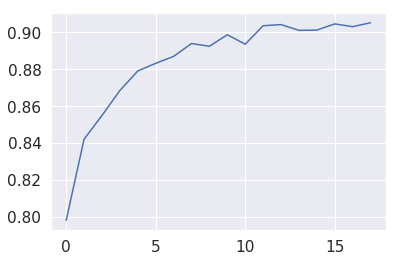

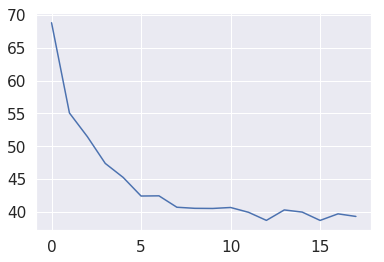

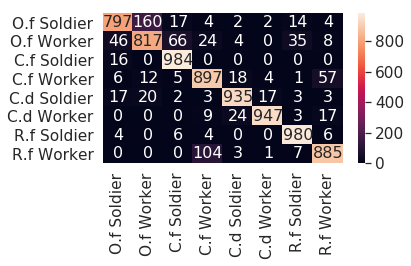

runtime :  4356.363404273987

[19] accuracy: 0.905 loss: 39.046



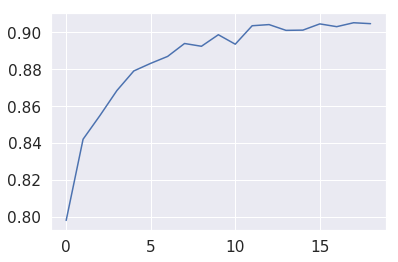

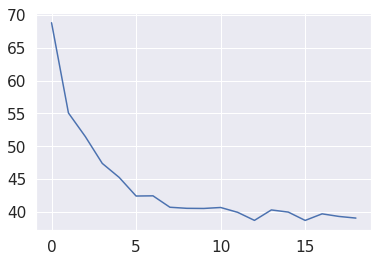

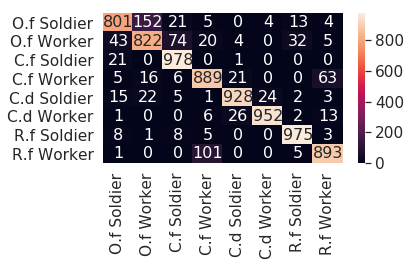

runtime :  4599.072354316711

[20] accuracy: 0.907 loss: 39.149



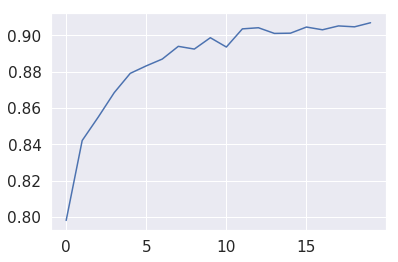

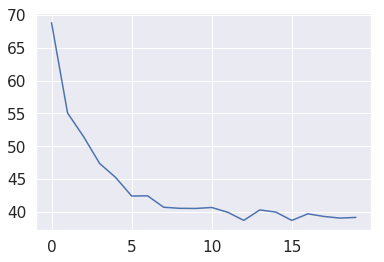

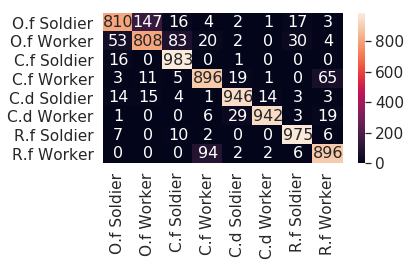

runtime :  4842.648229122162

[21] accuracy: 0.908 loss: 39.281



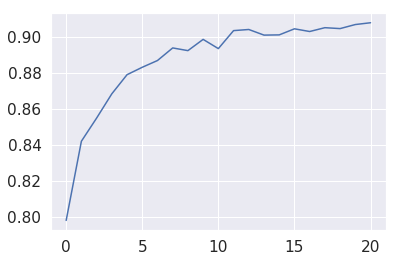

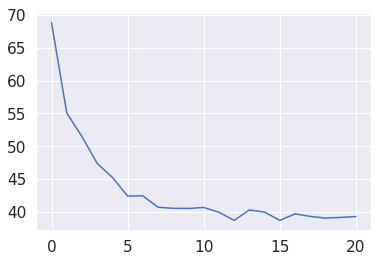

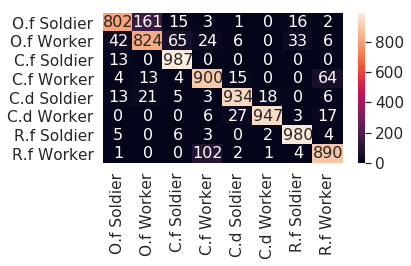

runtime :  5084.952043533325

[22] accuracy: 0.908 loss: 38.756



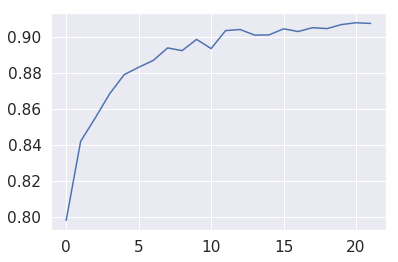

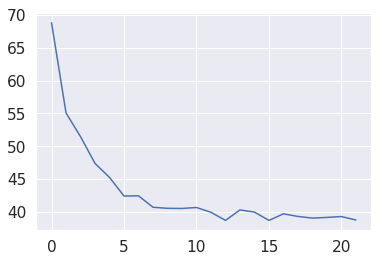

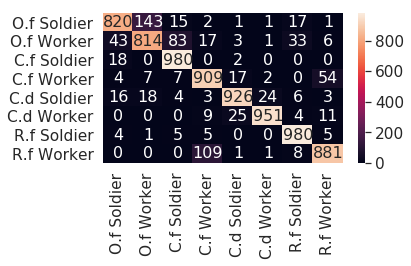

runtime :  5324.392362117767

[23] accuracy: 0.906 loss: 38.776



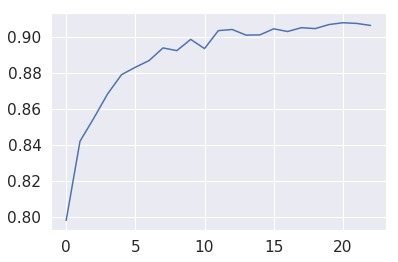

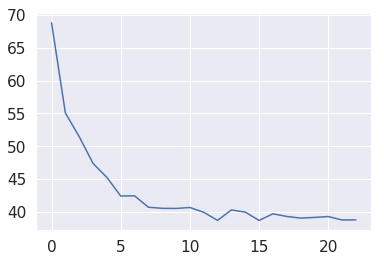

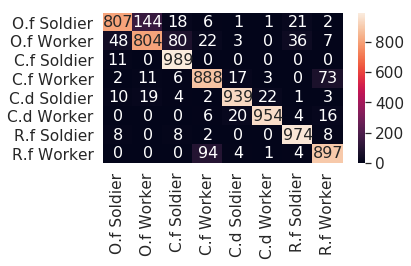

runtime :  5565.290568590164

[24] accuracy: 0.910 loss: 38.673



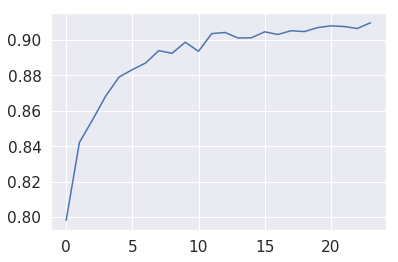

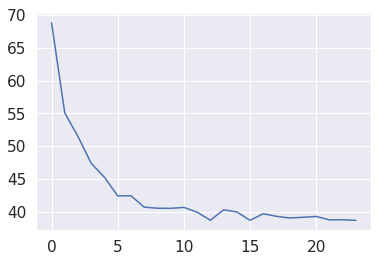

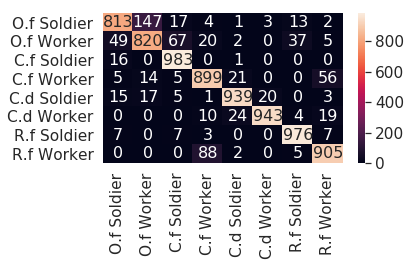

runtime :  5806.068317890167

[25] accuracy: 0.909 loss: 38.233



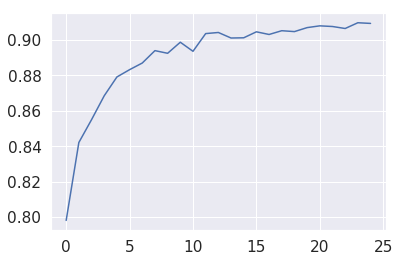

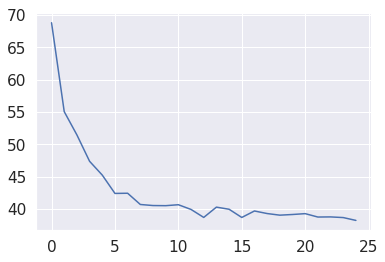

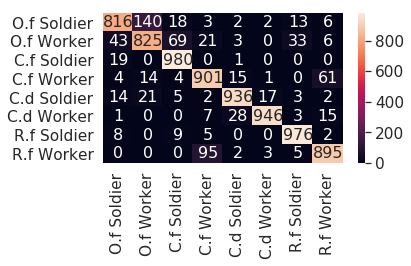

runtime :  6050.485261917114

[26] accuracy: 0.911 loss: 38.231



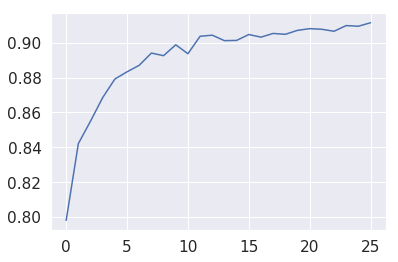

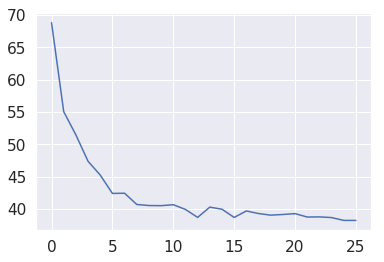

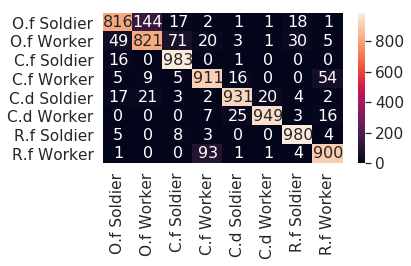

runtime :  6293.900027751923

[27] accuracy: 0.913 loss: 38.457



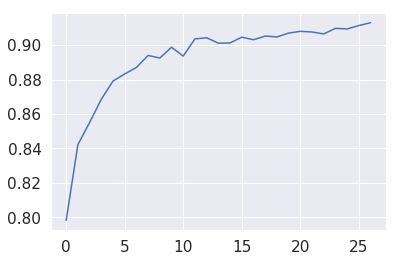

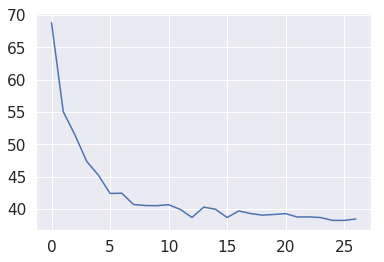

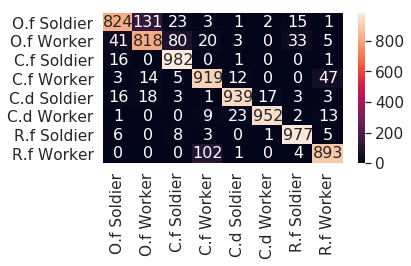

runtime :  6536.571214914322

[28] accuracy: 0.910 loss: 38.953



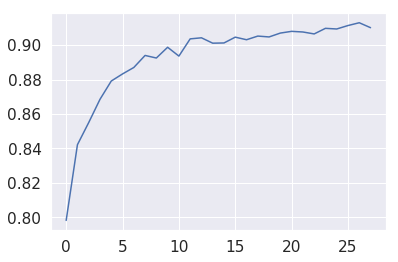

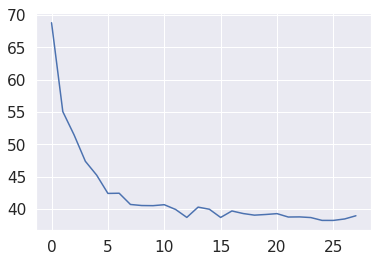

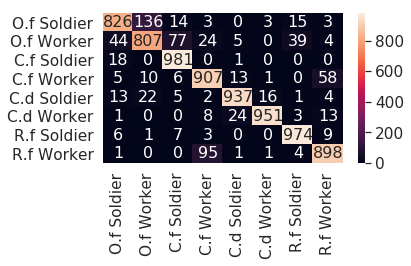

runtime :  6780.742908716202

[29] accuracy: 0.911 loss: 39.605



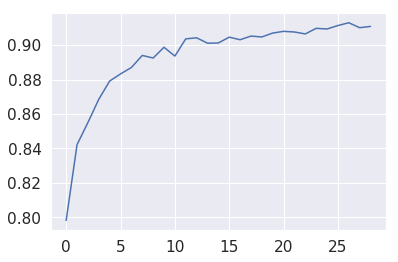

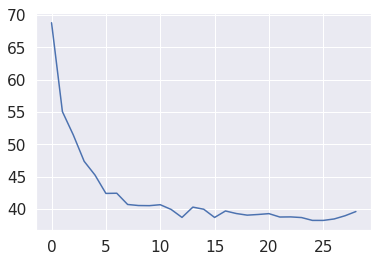

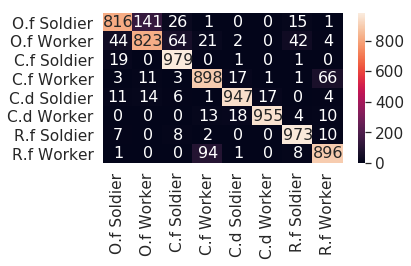

runtime :  7024.069760560989

[30] accuracy: 0.913 loss: 37.711



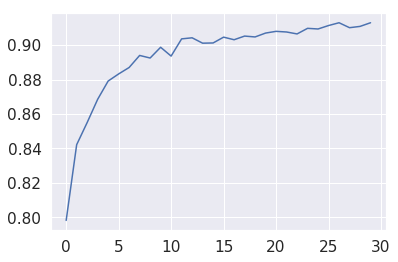

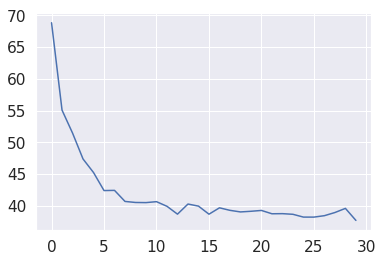

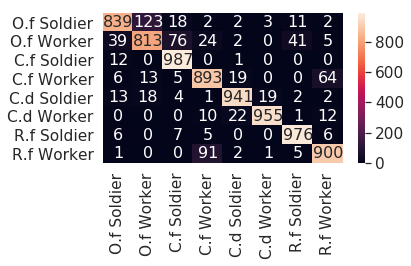

runtime :  7268.038531303406

[31] accuracy: 0.912 loss: 38.899



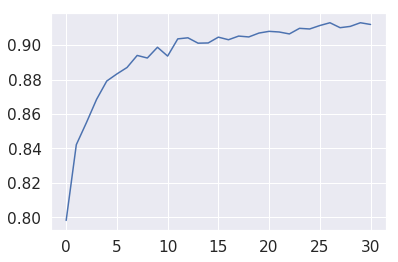

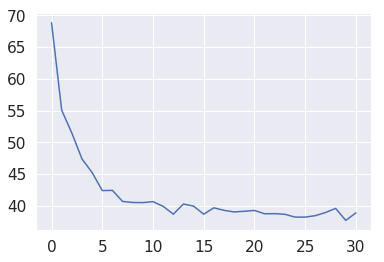

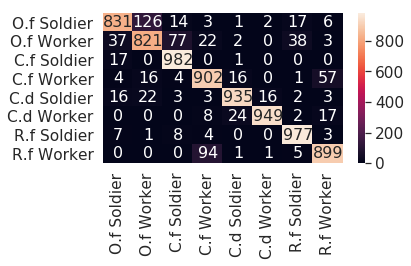

runtime :  7509.15557718277

[32] accuracy: 0.910 loss: 38.629



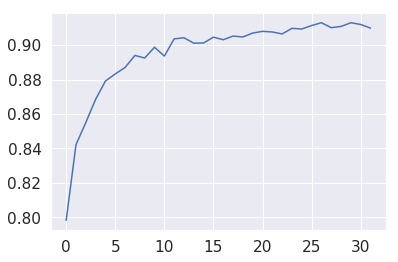

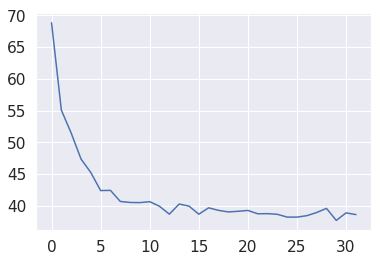

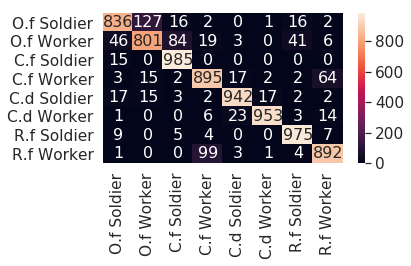

runtime :  7753.1748740673065

[33] accuracy: 0.915 loss: 38.721



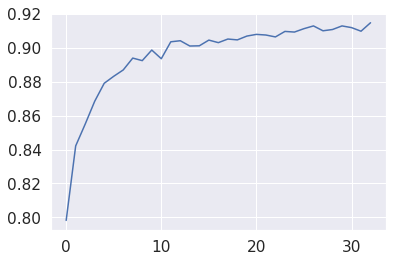

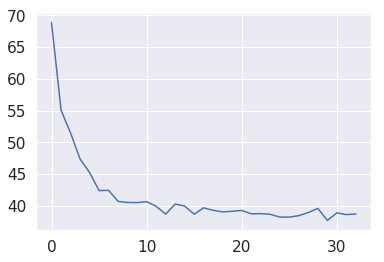

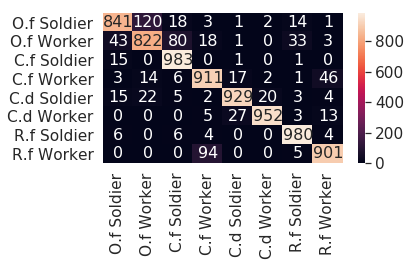

runtime :  7996.205064535141

[34] accuracy: 0.910 loss: 38.738



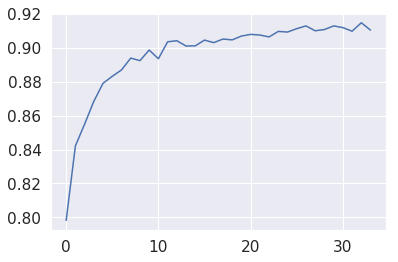

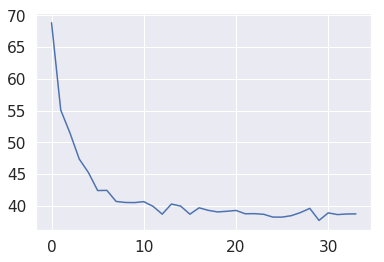

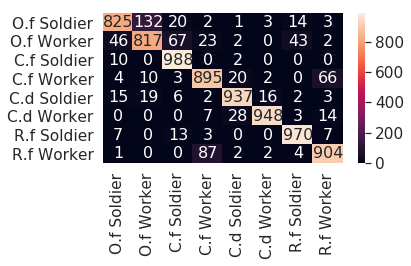

runtime :  8242.48322224617

[35] accuracy: 0.915 loss: 38.632



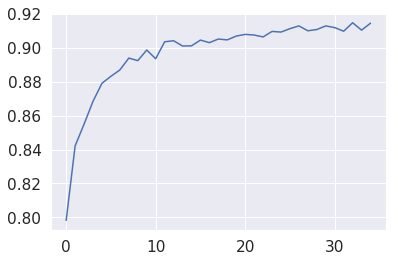

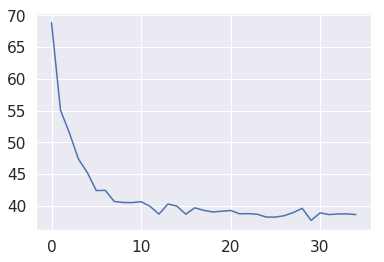

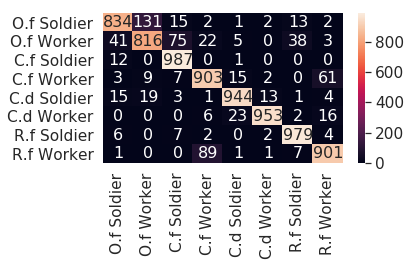

runtime :  8482.389651060104

[36] accuracy: 0.911 loss: 38.120



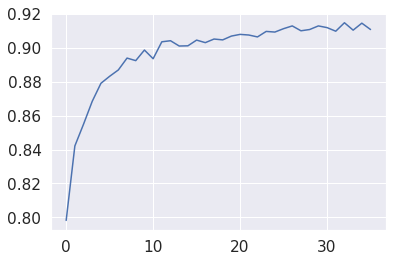

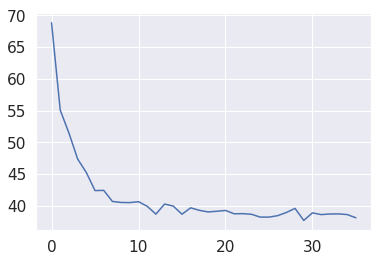

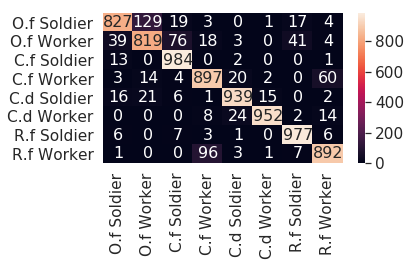

runtime :  8723.141079425812

[37] accuracy: 0.912 loss: 39.686



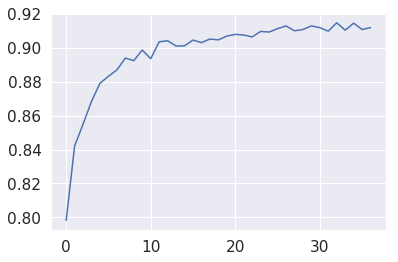

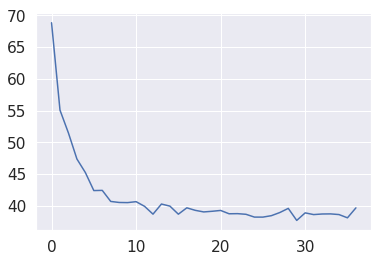

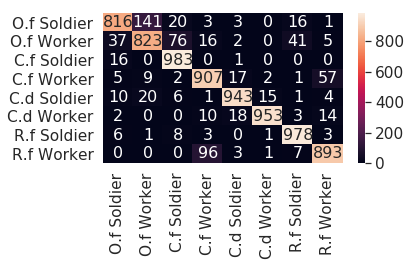

runtime :  8967.980927705765

[38] accuracy: 0.913 loss: 39.649



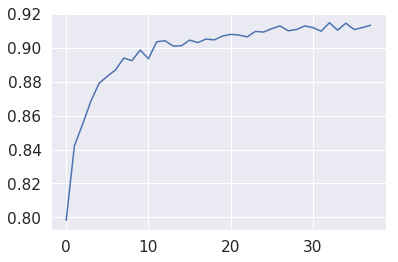

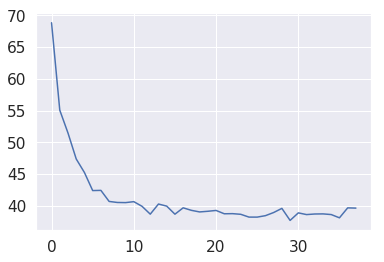

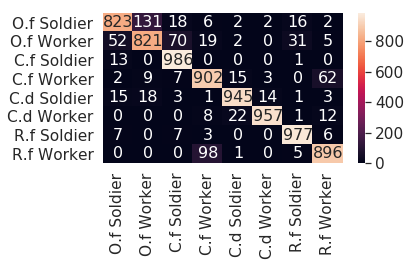

runtime :  9209.299398422241

[39] accuracy: 0.911 loss: 38.785



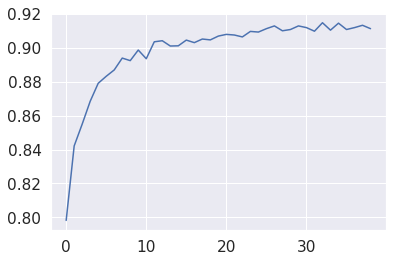

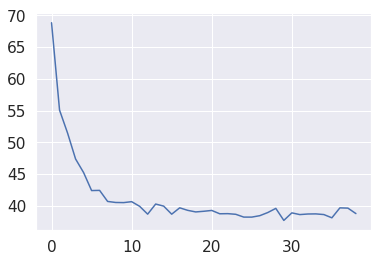

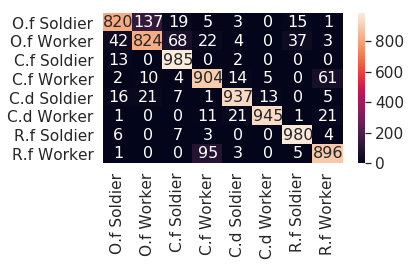

runtime :  9450.741129875183

[40] accuracy: 0.915 loss: 39.504



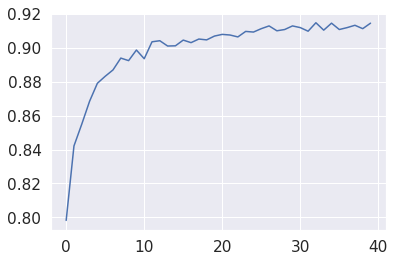

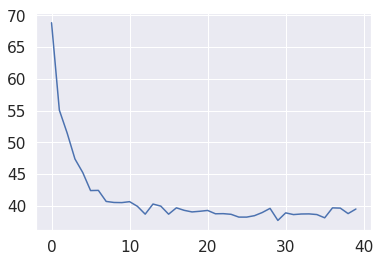

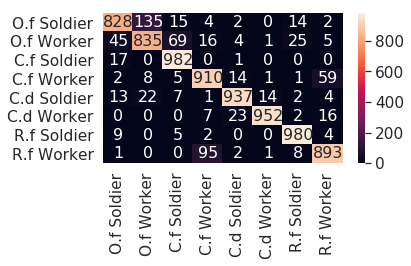

runtime :  9693.678749322891

[41] accuracy: 0.912 loss: 38.732



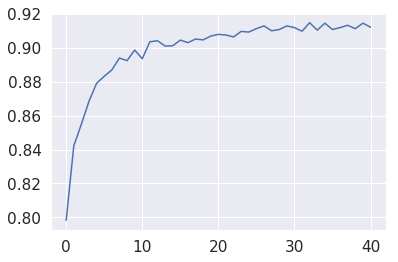

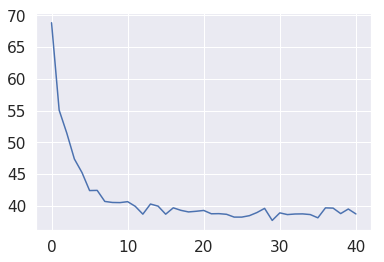

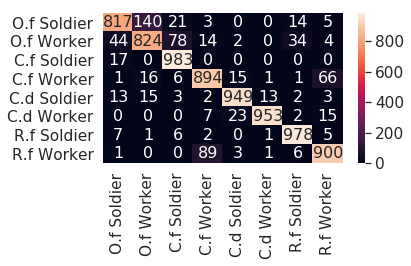

runtime :  9935.327687978745

[42] accuracy: 0.915 loss: 38.769



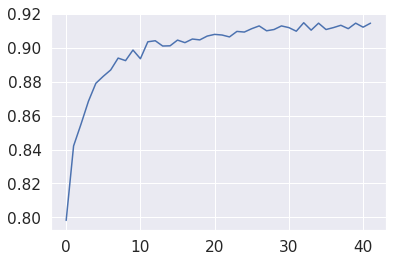

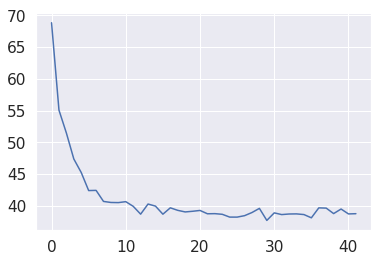

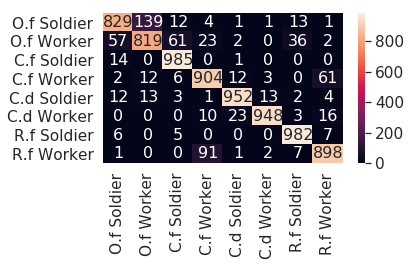

runtime :  10178.10229063034

[43] accuracy: 0.910 loss: 38.629



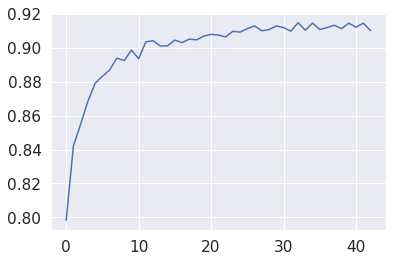

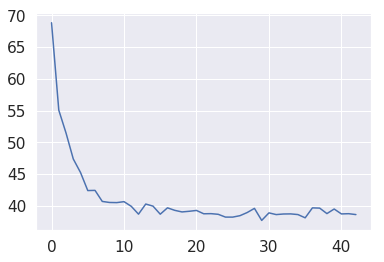

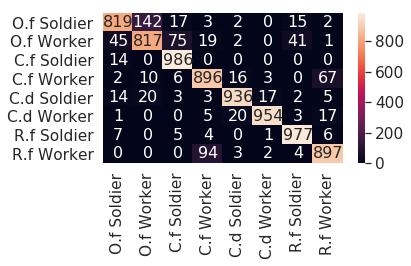

runtime :  10421.248489618301

[44] accuracy: 0.913 loss: 39.063



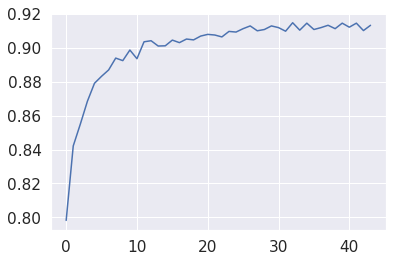

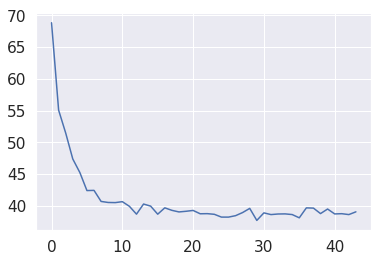

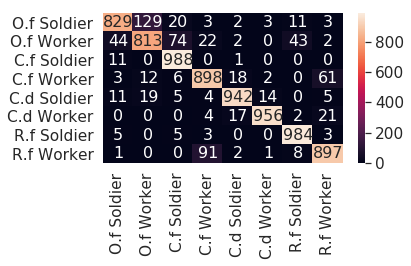

runtime :  10664.266232967377

[45] accuracy: 0.912 loss: 39.112



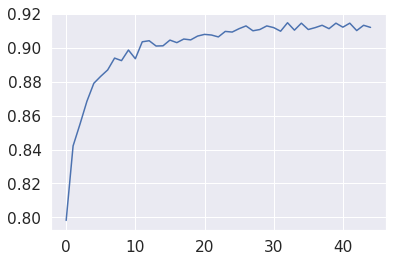

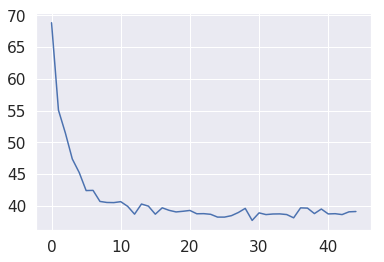

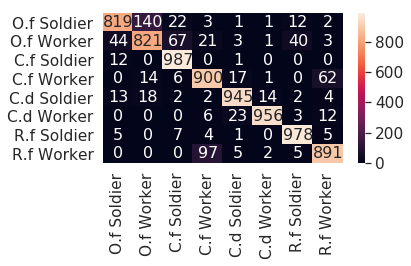

runtime :  10907.485264778137

[46] accuracy: 0.915 loss: 39.185



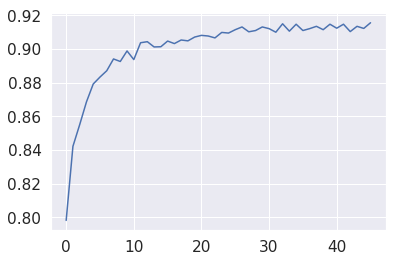

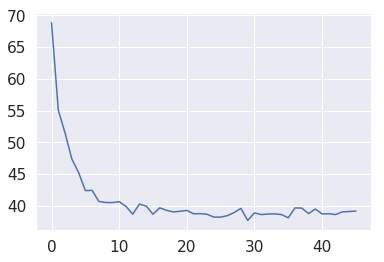

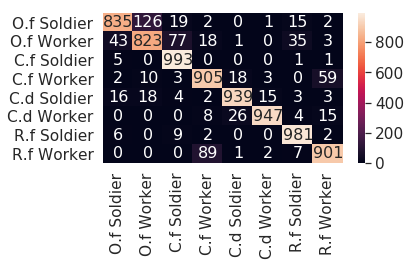

runtime :  11150.497166156769

[47] accuracy: 0.910 loss: 40.551



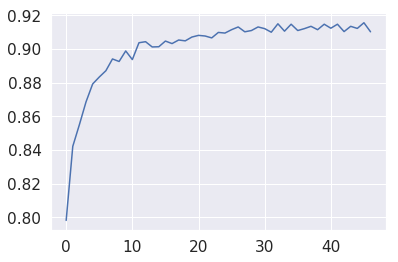

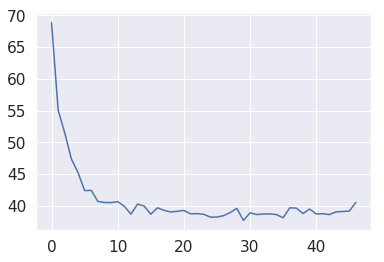

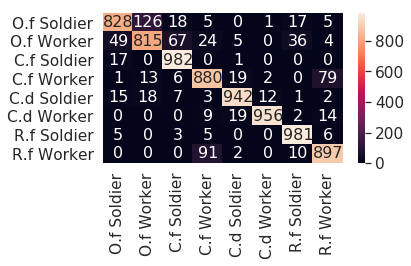

runtime :  11393.423302650452

[48] accuracy: 0.913 loss: 38.769



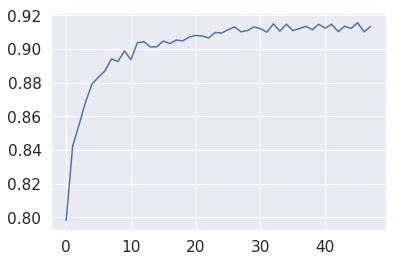

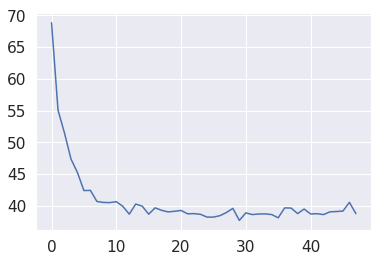

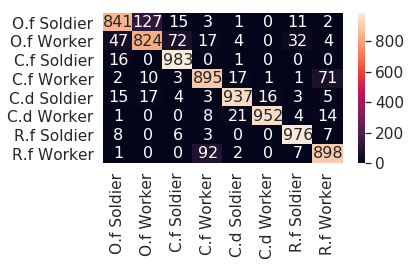

runtime :  11632.262854099274

[49] accuracy: 0.915 loss: 38.453



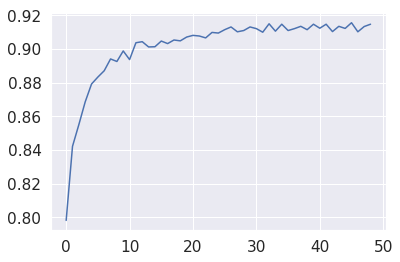

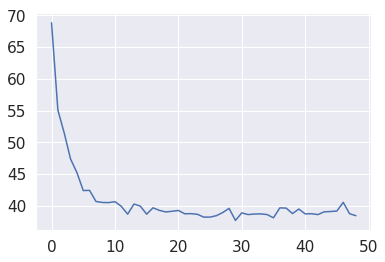

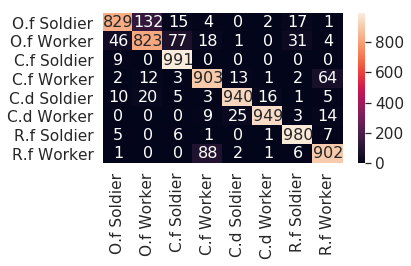

runtime :  11873.08354139328

[50] accuracy: 0.914 loss: 38.943



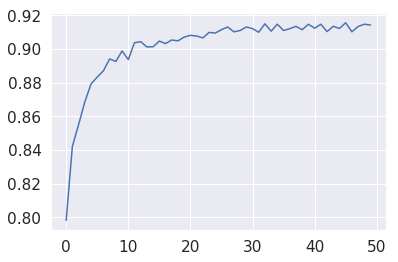

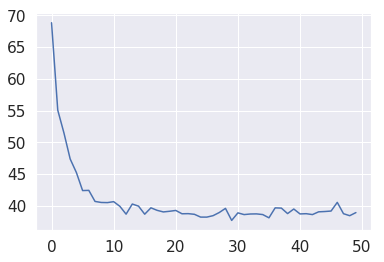

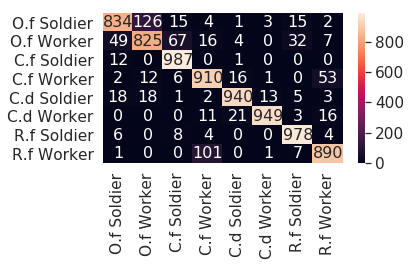

runtime :  12120.233404636383

[51] accuracy: 0.917 loss: 38.047



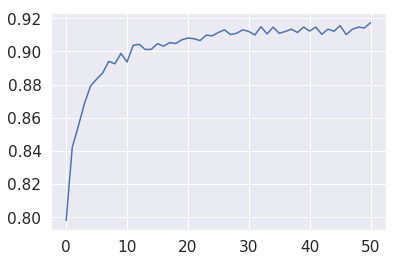

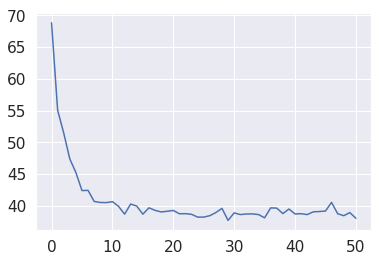

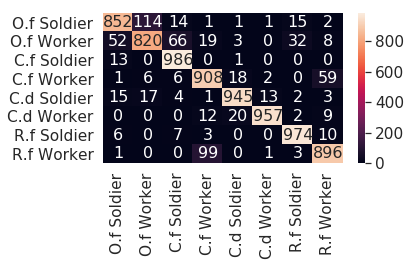

runtime :  12364.27512049675

[52] accuracy: 0.912 loss: 38.951



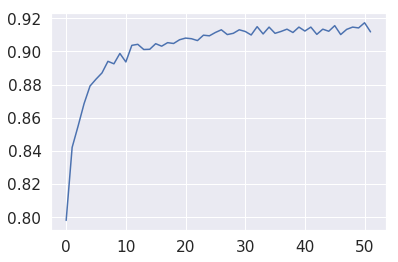

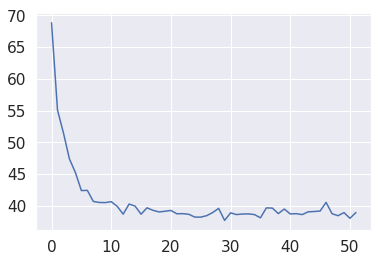

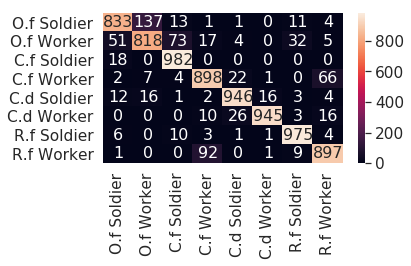

runtime :  12607.79385137558

[53] accuracy: 0.915 loss: 38.489



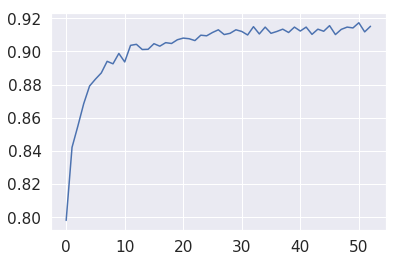

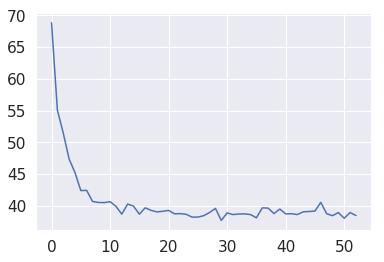

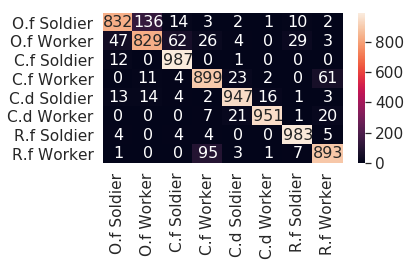

runtime :  12851.108438014984

[54] accuracy: 0.913 loss: 38.424



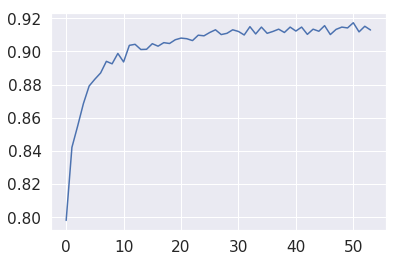

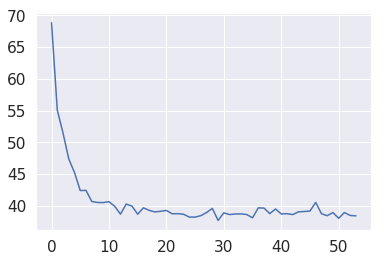

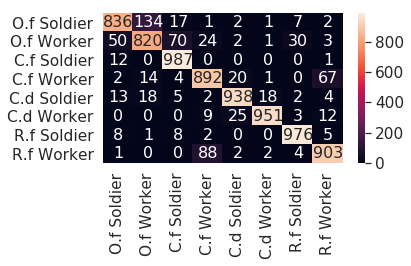

runtime :  13093.086203575134

[55] accuracy: 0.916 loss: 37.957



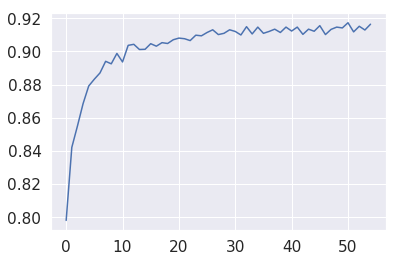

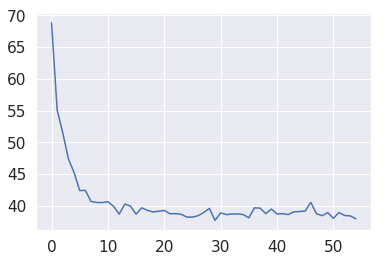

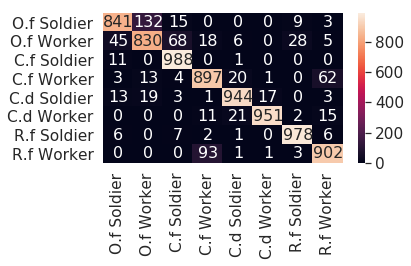

runtime :  13334.87604546547

[56] accuracy: 0.918 loss: 38.479



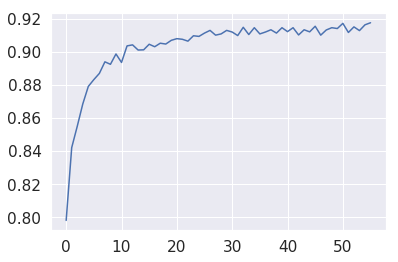

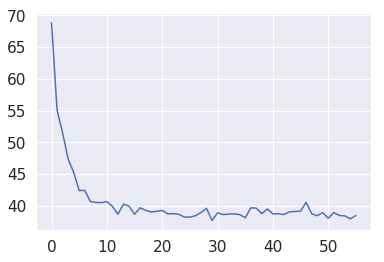

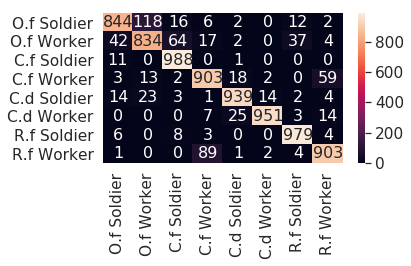

runtime :  13580.142770290375

[57] accuracy: 0.913 loss: 39.135



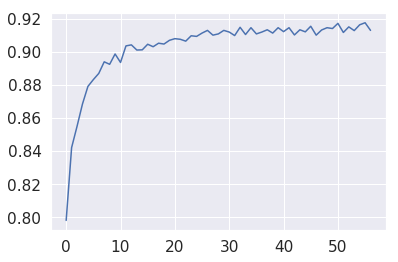

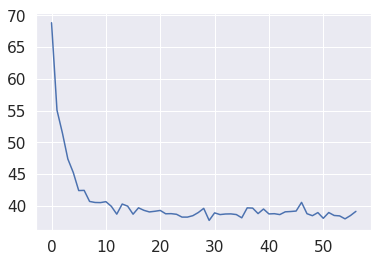

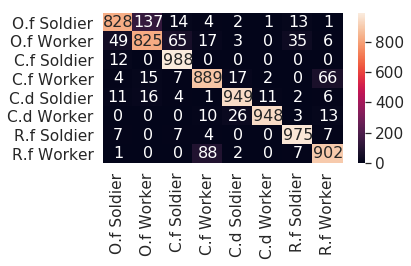

runtime :  13823.51710677147

[58] accuracy: 0.919 loss: 39.302



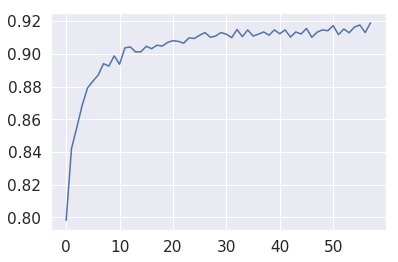

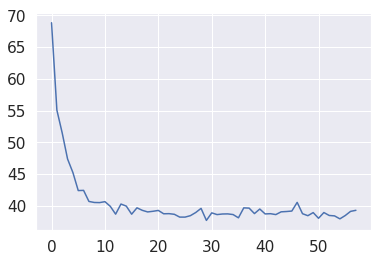

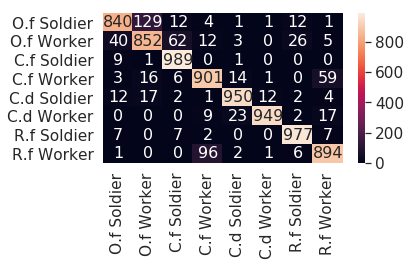

runtime :  14064.461254835129

[59] accuracy: 0.912 loss: 39.787



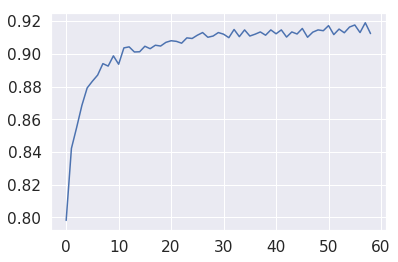

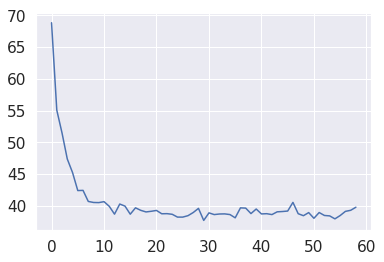

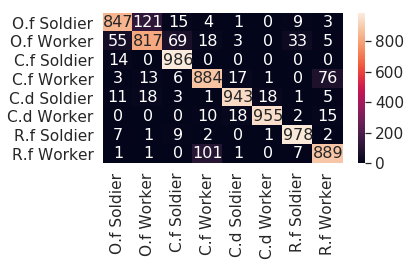

runtime :  14308.216529369354

[60] accuracy: 0.917 loss: 39.618



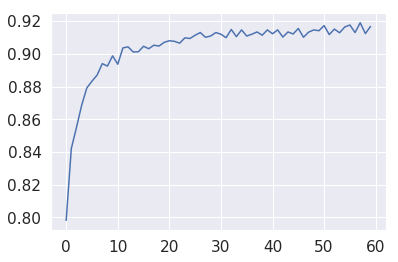

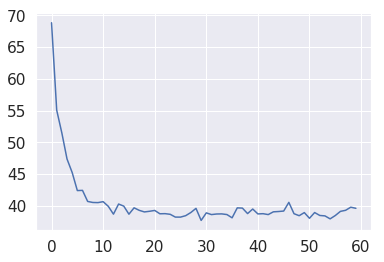

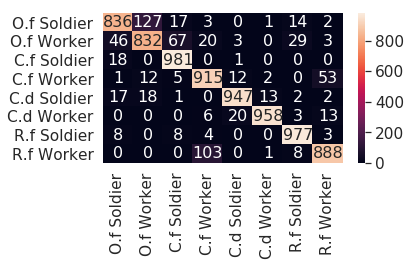

runtime :  14554.13070678711

[61] accuracy: 0.916 loss: 38.234



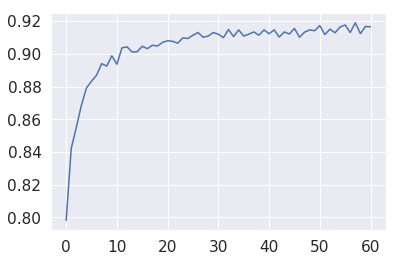

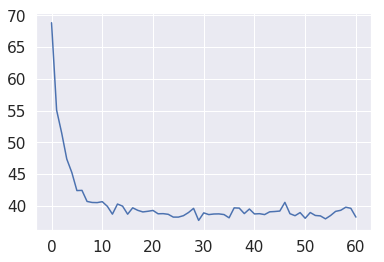

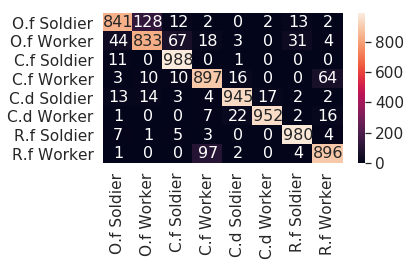

runtime :  14798.197891950607

[62] accuracy: 0.917 loss: 38.476



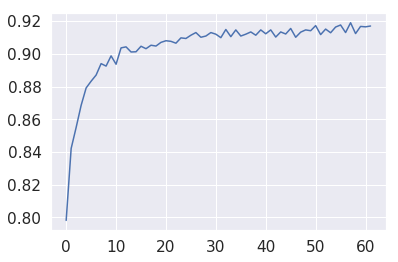

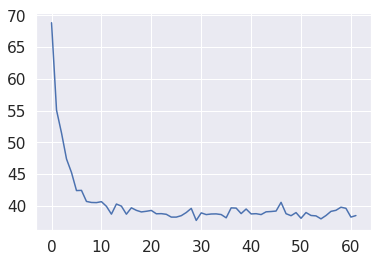

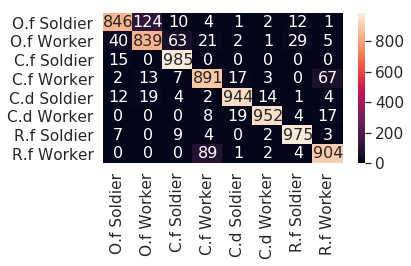

runtime :  15042.82685470581

[63] accuracy: 0.921 loss: 37.832



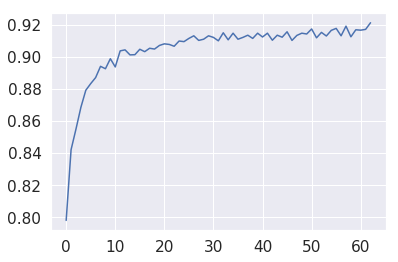

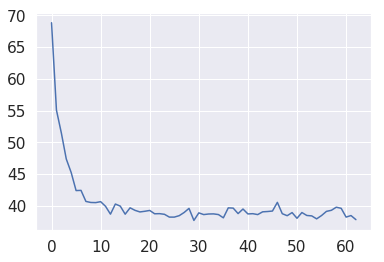

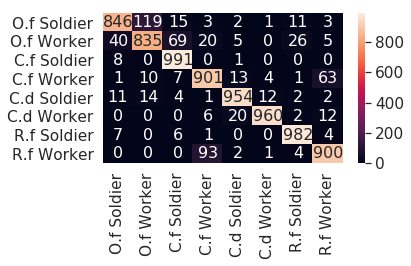

runtime :  15288.560653924942

[64] accuracy: 0.914 loss: 39.302



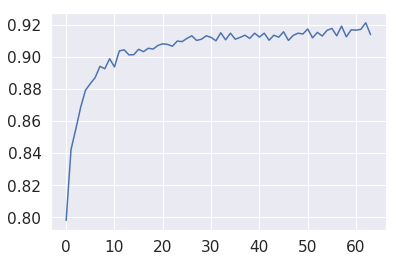

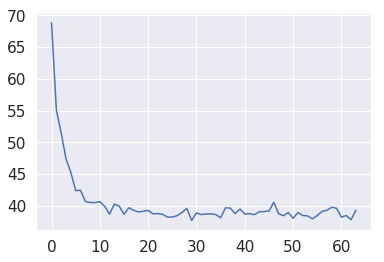

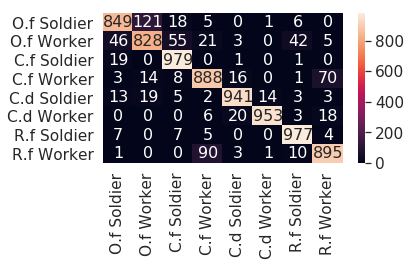

runtime :  15530.347487449646

[65] accuracy: 0.916 loss: 38.953



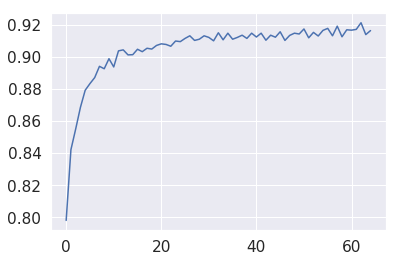

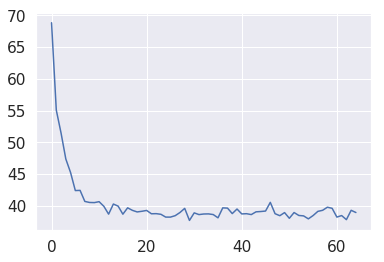

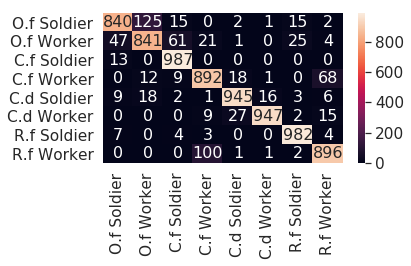

runtime :  15772.227441549301

[66] accuracy: 0.917 loss: 39.217



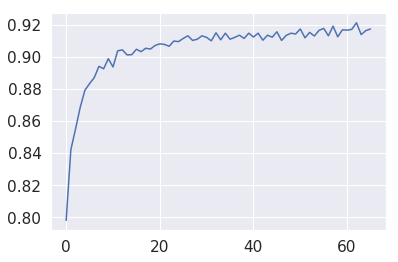

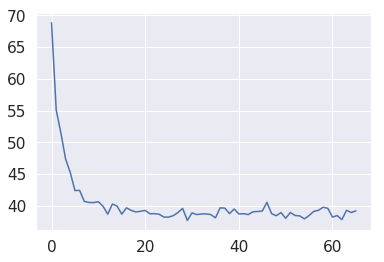

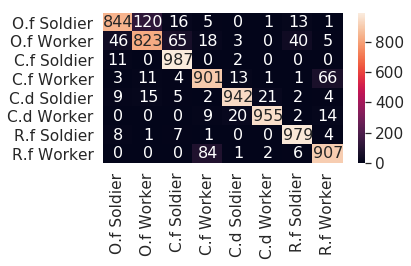

runtime :  16015.531744480133

[67] accuracy: 0.914 loss: 40.265



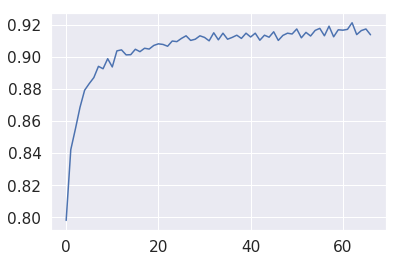

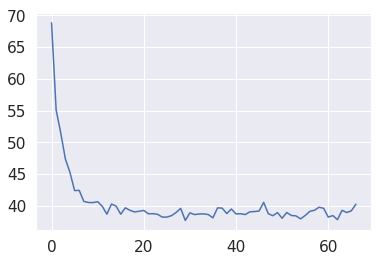

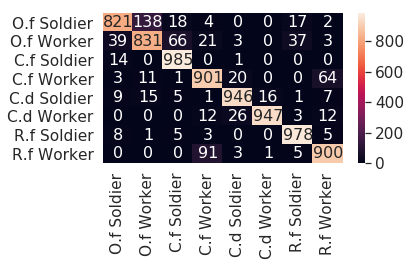

runtime :  16262.202489614487

[68] accuracy: 0.916 loss: 40.446



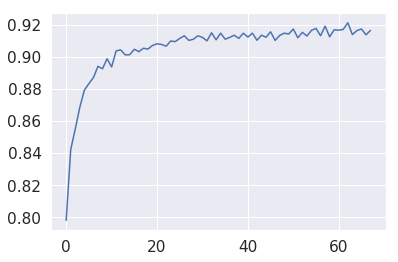

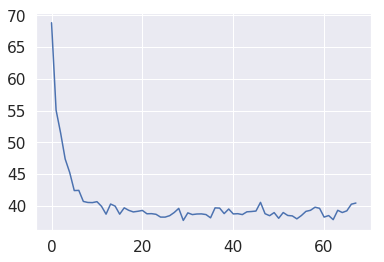

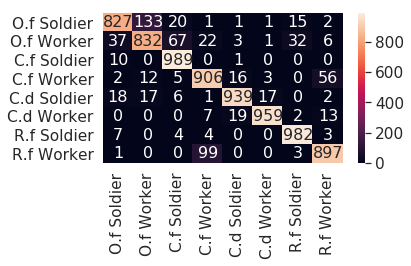

runtime :  16504.91726875305

[69] accuracy: 0.916 loss: 40.260



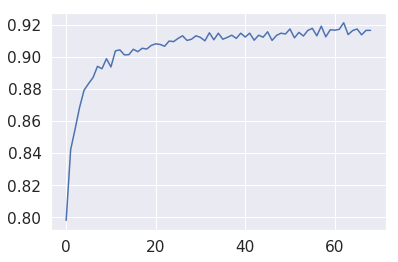

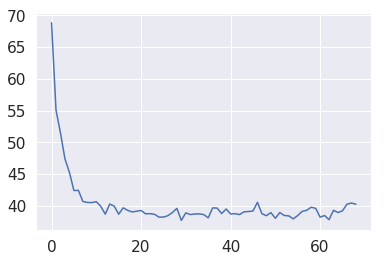

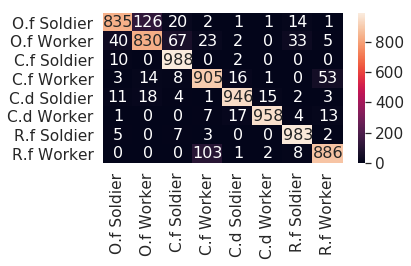

runtime :  16746.2471036911

[70] accuracy: 0.916 loss: 39.358



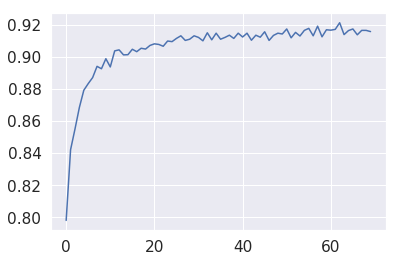

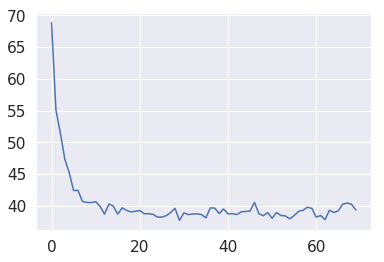

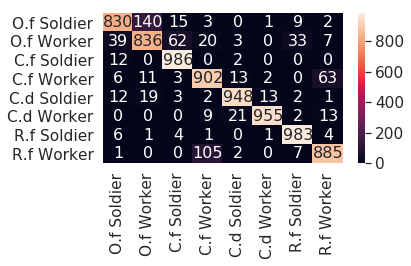

runtime :  16991.116352558136

[71] accuracy: 0.915 loss: 40.437



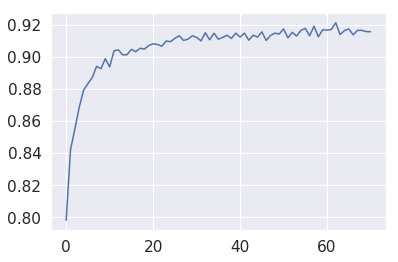

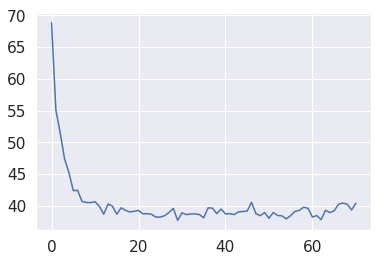

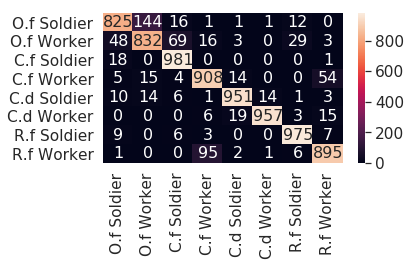

runtime :  17234.956449985504

[72] accuracy: 0.917 loss: 39.460



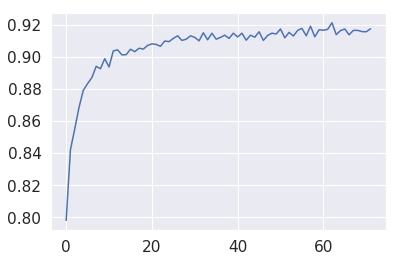

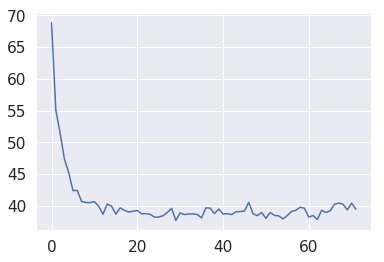

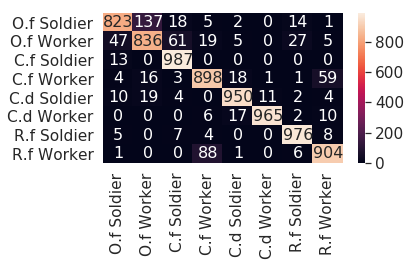

runtime :  17482.378658533096

[73] accuracy: 0.918 loss: 38.639



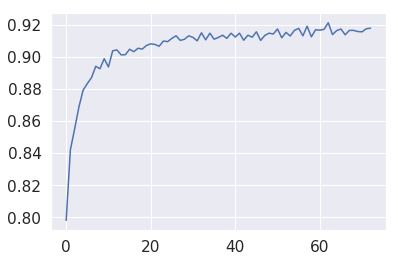

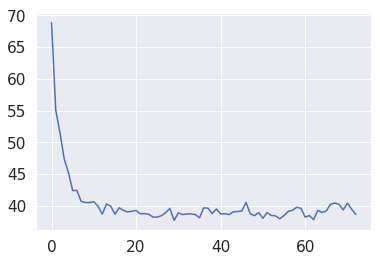

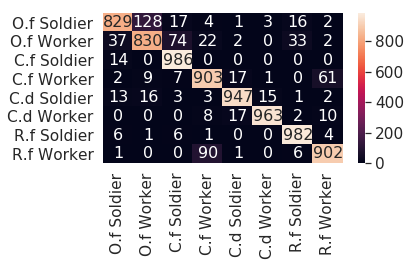

runtime :  17724.73495745659

[74] accuracy: 0.917 loss: 39.708



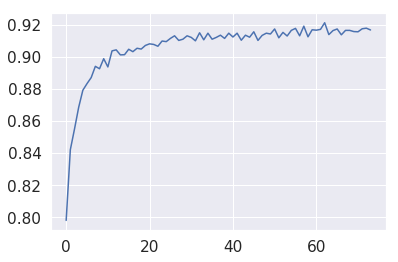

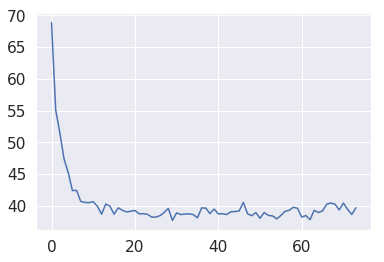

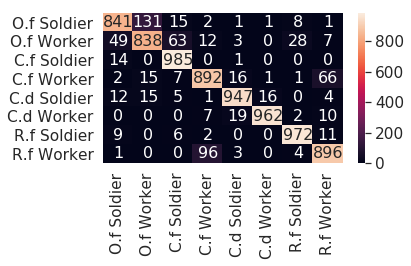

runtime :  17967.27062702179

[75] accuracy: 0.915 loss: 39.165



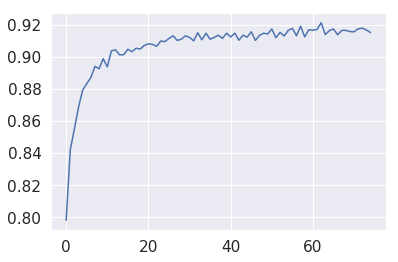

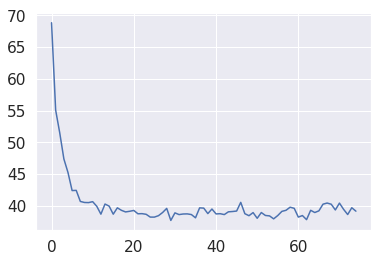

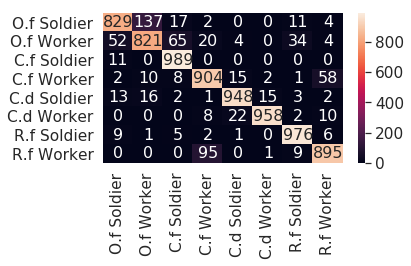

runtime :  18210.300099372864

[76] accuracy: 0.919 loss: 38.906



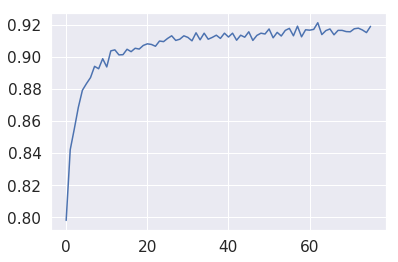

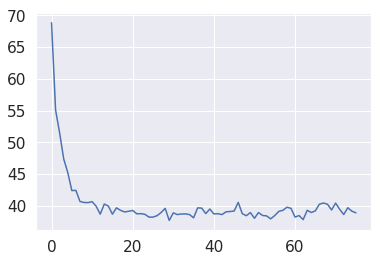

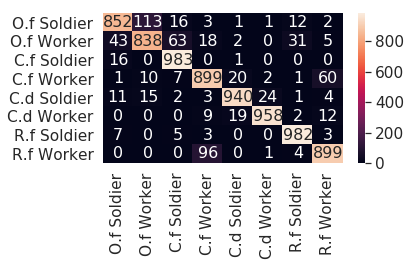

runtime :  18451.469883441925

[77] accuracy: 0.917 loss: 38.565



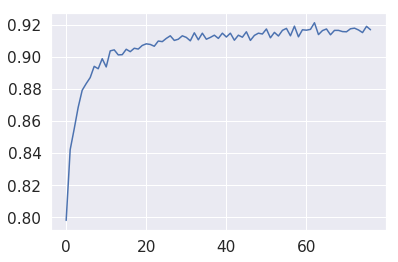

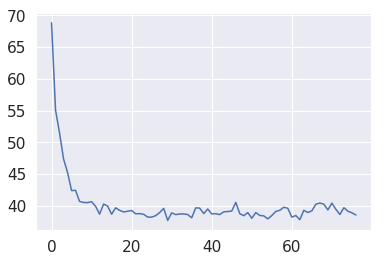

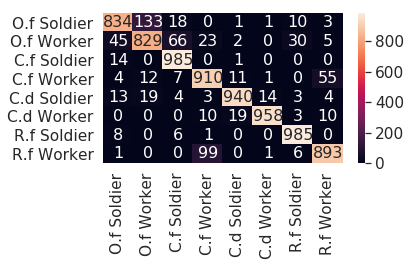

runtime :  18695.3212556839

[78] accuracy: 0.919 loss: 39.267



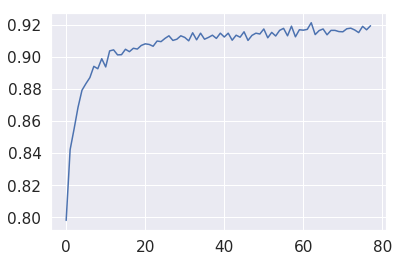

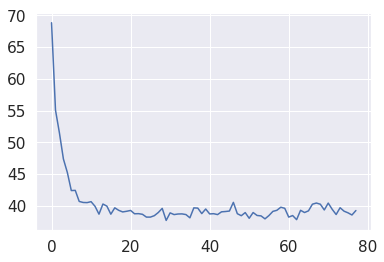

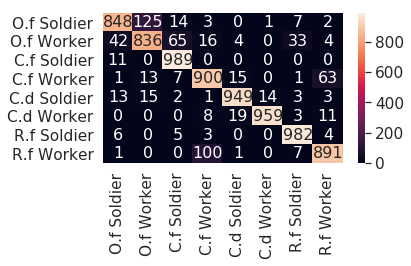

runtime :  18938.95483660698

[79] accuracy: 0.921 loss: 38.367



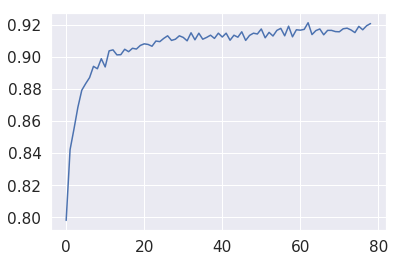

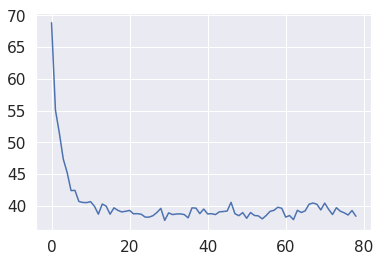

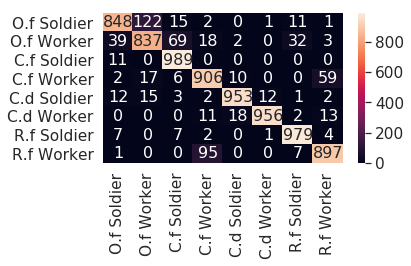

runtime :  19180.311225891113

[80] accuracy: 0.918 loss: 39.339



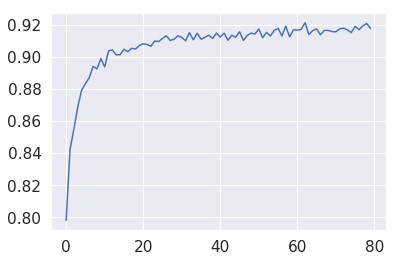

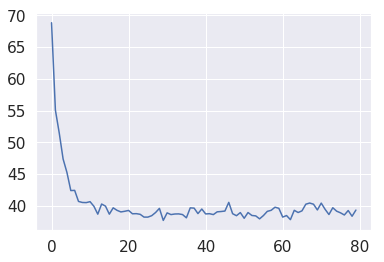

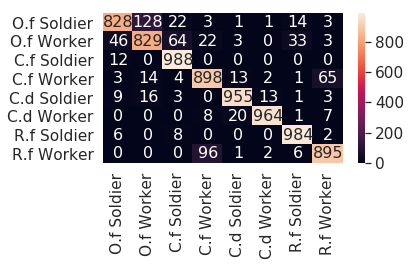

runtime :  19425.468332529068

[81] accuracy: 0.918 loss: 38.685



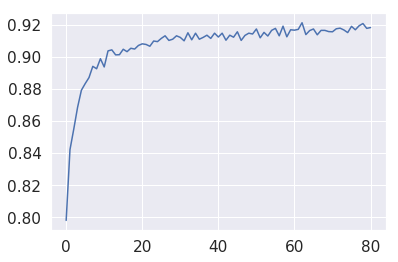

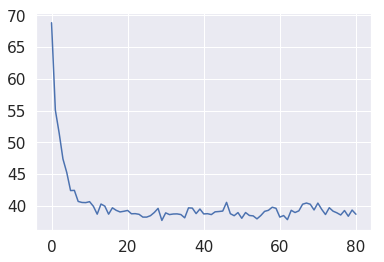

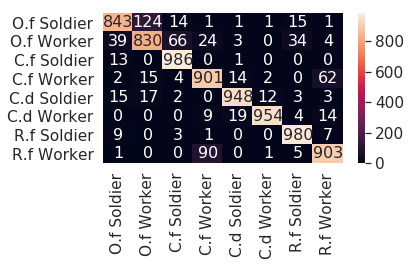

runtime :  19670.59302997589

[82] accuracy: 0.917 loss: 39.106



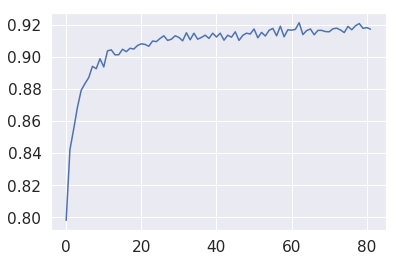

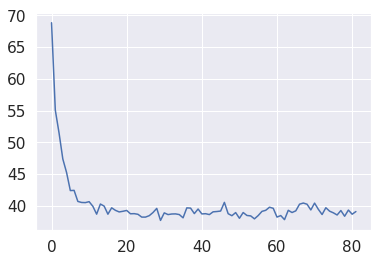

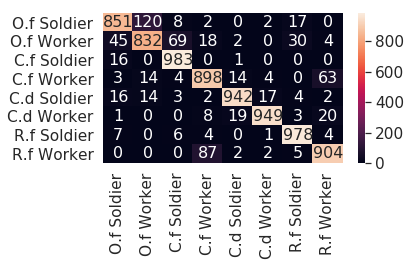

runtime :  19913.446289777756

[83] accuracy: 0.920 loss: 40.356



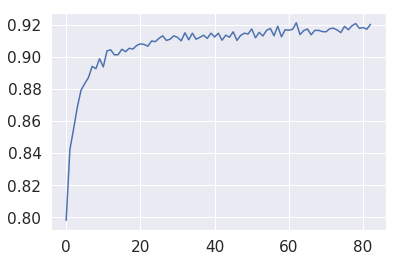

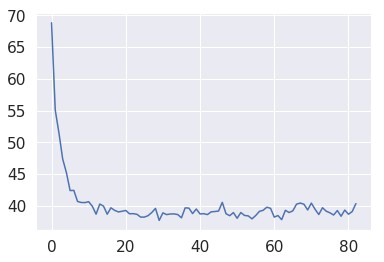

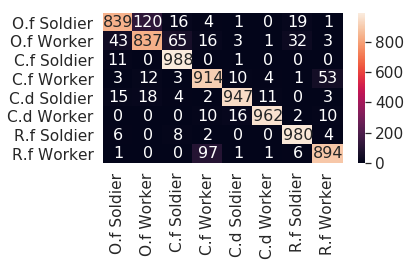

runtime :  20160.959740161896

[84] accuracy: 0.916 loss: 39.827



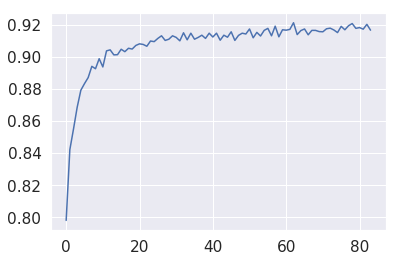

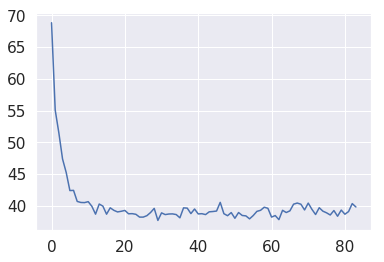

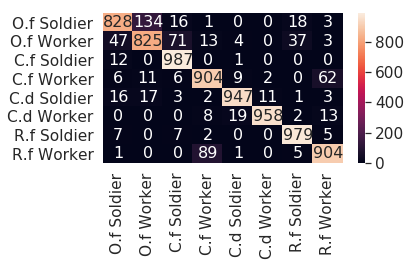

runtime :  20403.175047159195

[85] accuracy: 0.917 loss: 39.553



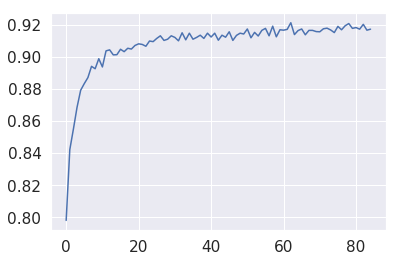

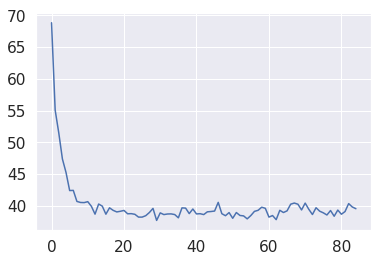

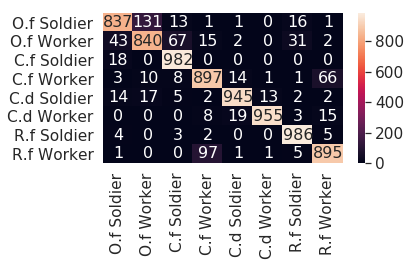

runtime :  20648.50634908676

[86] accuracy: 0.920 loss: 38.842



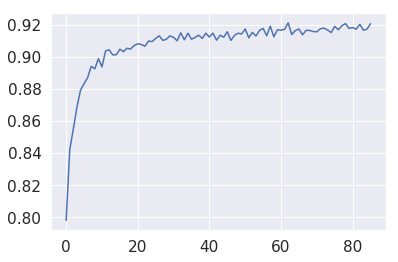

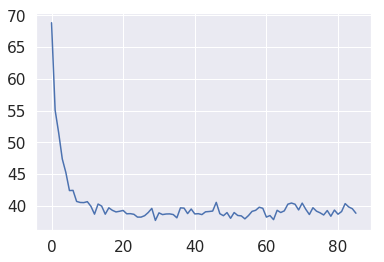

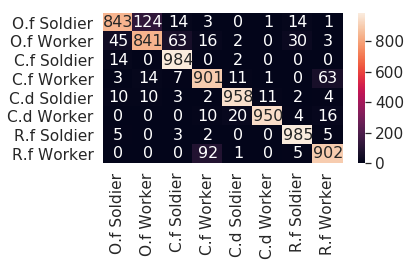

runtime :  20894.268993854523

[87] accuracy: 0.917 loss: 38.761



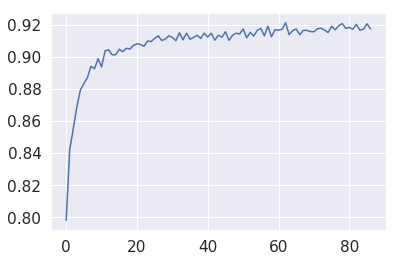

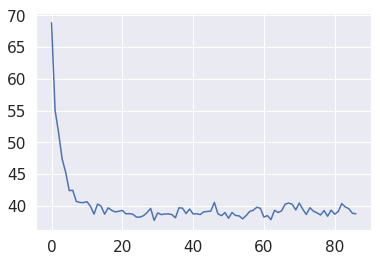

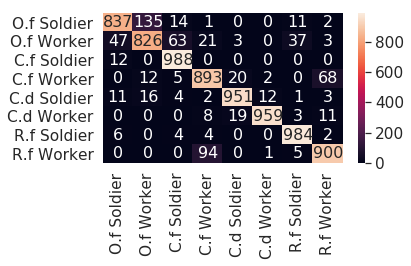

runtime :  21139.98735666275

[88] accuracy: 0.918 loss: 39.214



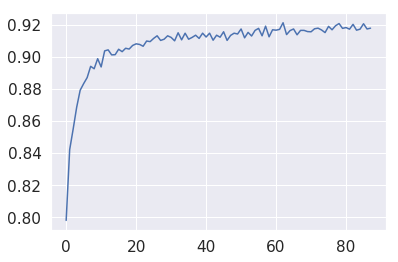

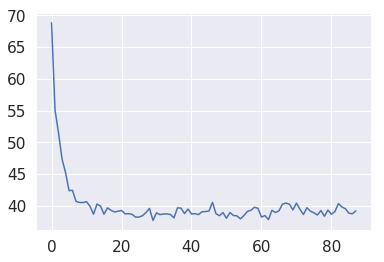

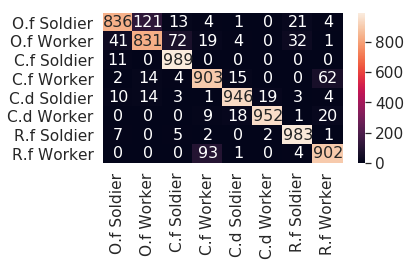

runtime :  21383.878306388855

[89] accuracy: 0.918 loss: 39.347



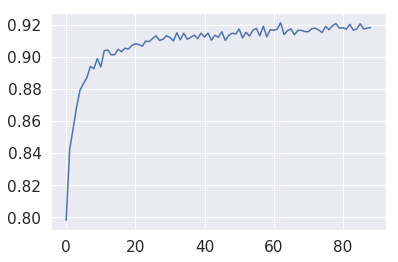

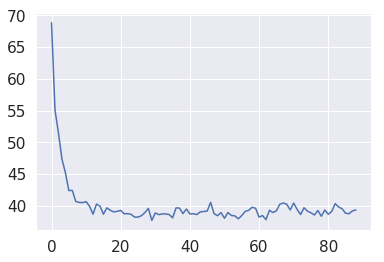

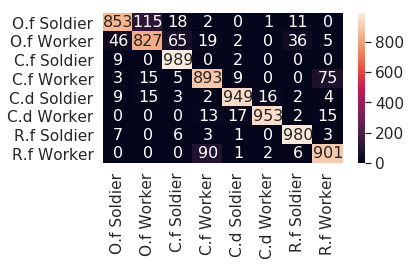

runtime :  21627.296191453934

[90] accuracy: 0.914 loss: 40.679



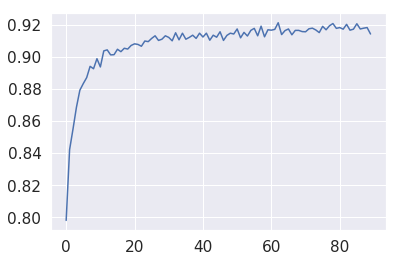

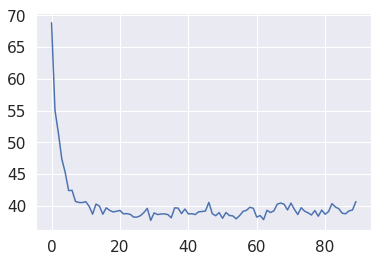

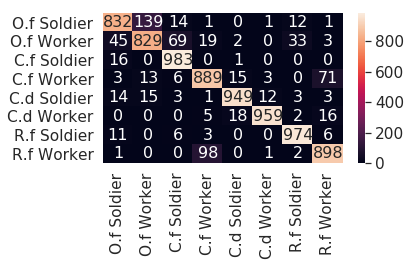

runtime :  21873.241673469543

[91] accuracy: 0.916 loss: 39.943



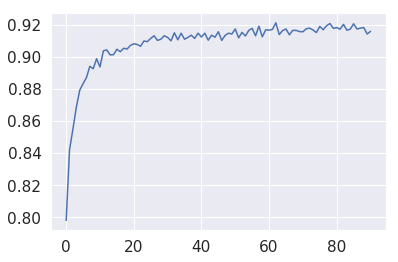

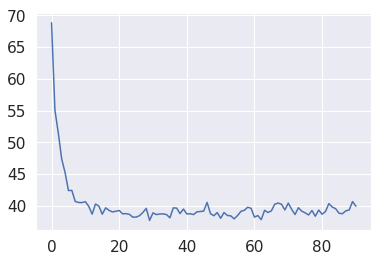

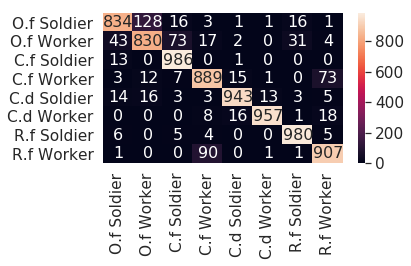

runtime :  22117.899709939957

[92] accuracy: 0.915 loss: 39.713



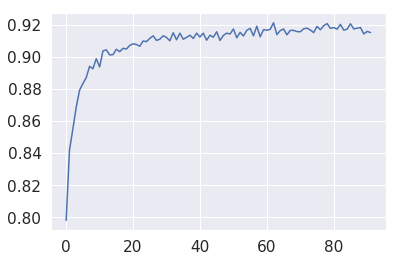

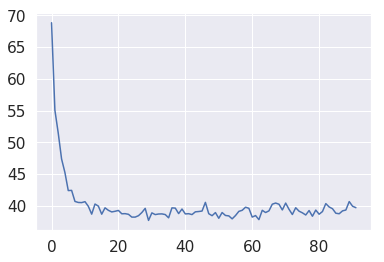

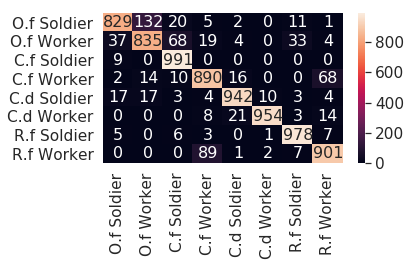

runtime :  22363.685616731644

[93] accuracy: 0.916 loss: 39.660



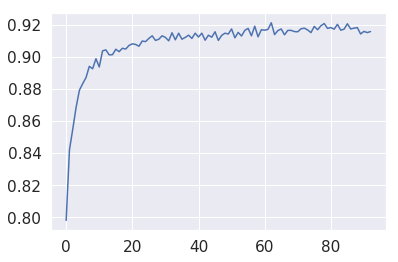

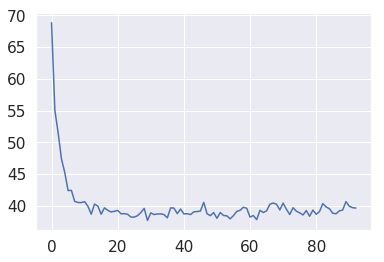

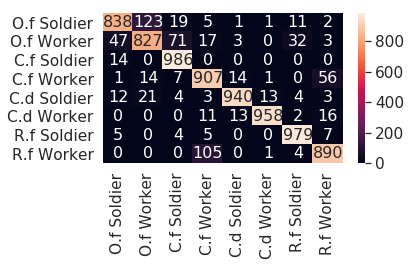

runtime :  22611.24119591713

[94] accuracy: 0.915 loss: 41.521



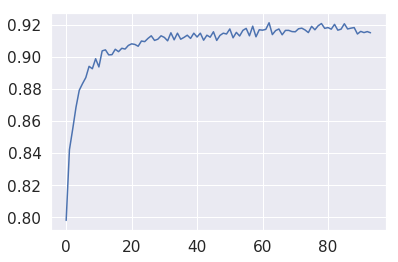

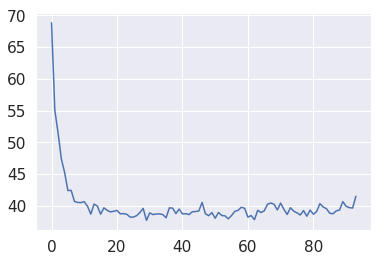

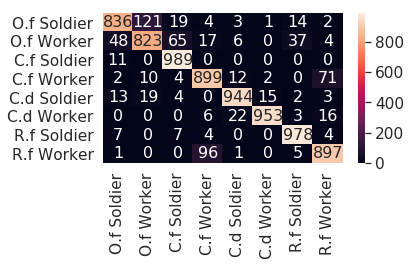

runtime :  22855.18236708641

[95] accuracy: 0.917 loss: 39.478



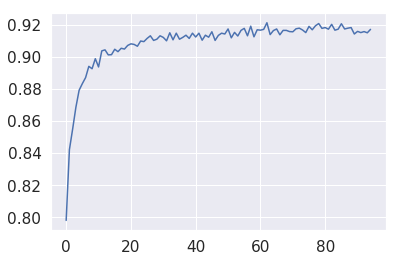

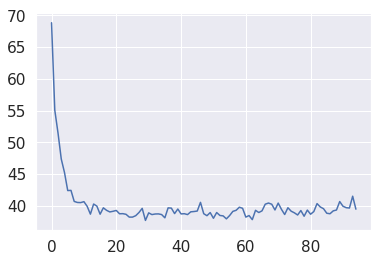

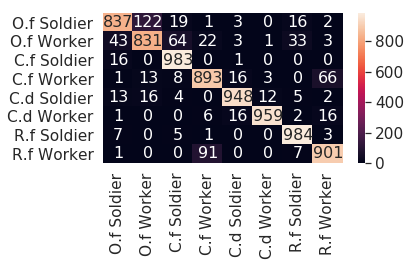

runtime :  23098.14142537117

[96] accuracy: 0.919 loss: 39.006



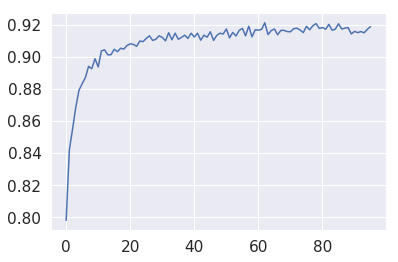

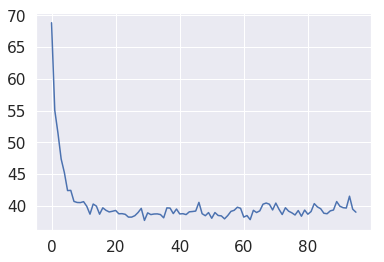

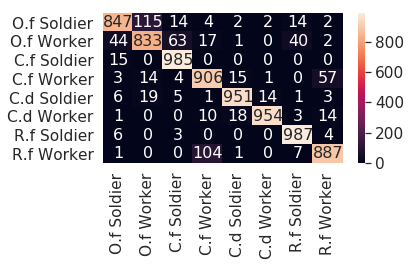

runtime :  23342.54534983635

[97] accuracy: 0.919 loss: 39.943



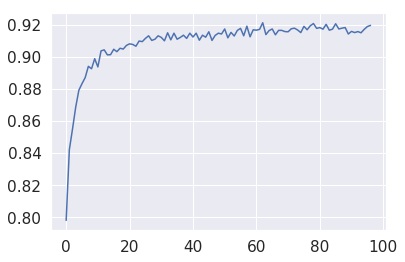

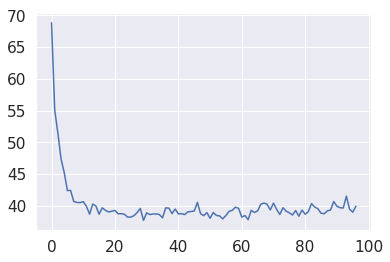

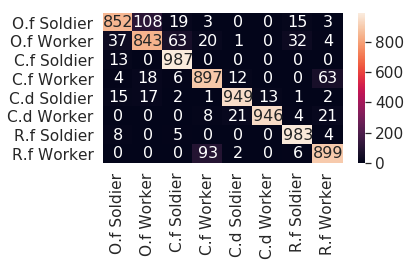

runtime :  23585.74138069153

[98] accuracy: 0.921 loss: 38.581



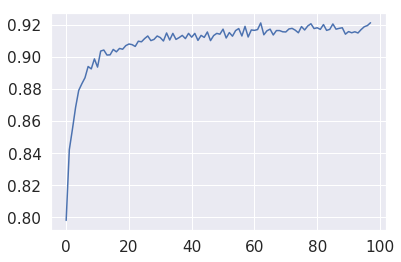

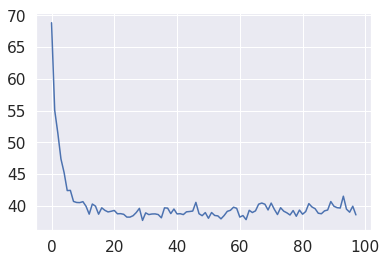

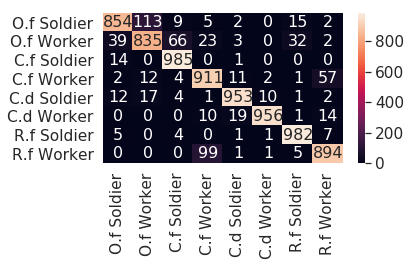

runtime :  23832.56458735466

[99] accuracy: 0.919 loss: 39.375



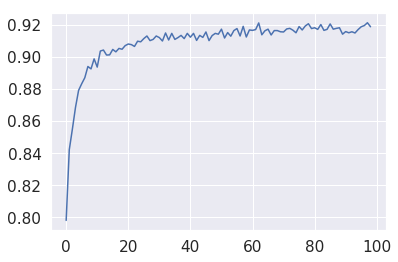

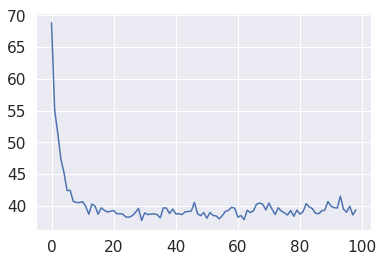

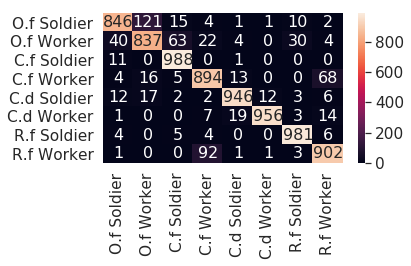

runtime :  23991.3353433609

[100] accuracy: 0.921 loss: 38.637



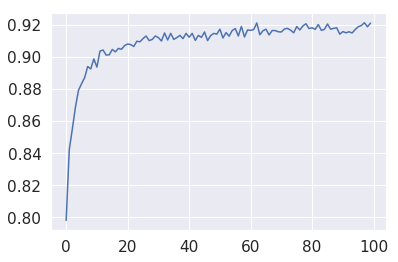

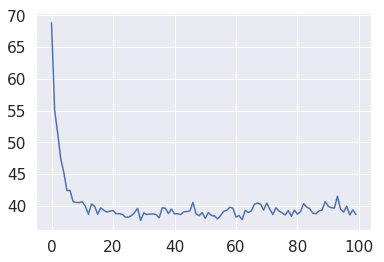

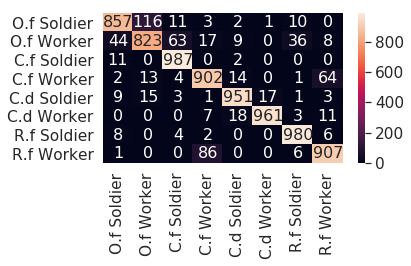

runtime :  24056.240139245987


In [35]:
import seaborn as sn
import pandas as pd
import matplotlib.pyplot as plt
test_acc = []
test_loss = []
import time
start = time.time()
# classes2 = ["O. formosanus Worker","C. formosanus Worker", "C. domesticus Worker", "R. flaviceps Worker"]
for model_num in range(1, EPOCH+1):
    wrong_images = []
    wrong_answer = []
    actual_answer = []
    right_images = []
    right_answer = []
    weight_path = model_directory + "%03d_weights.pt" % (model_num)
    state_dict = torch.load(weight_path, map_location='cuda:0')
    model.load_state_dict(state_dict)
    running_loss = 0.0
    total = 0
    correct = 0
    confusion_matrix = torch.zeros(len(classes), len(classes))
    for step, (labels, images, paths) in enumerate(testloader):
        optimizer.zero_grad()
        images = images.detach().cuda()
        labels = labels.detach().cuda()
        outputs = model(images)
        _, predicted = torch.max(outputs.data, 1)
        # append to the wrong list (test log file)
        for i in range(len(predicted)):
            if predicted[i] != labels[i]:
#                 print(paths[i], predicted[i], labels[i])
                wrong_images.append(paths[i])
                wrong_answer.append(predicted[i].item())
                actual_answer.append(labels[i].item())
            else:
                right_images.append(paths[i])
                right_answer.append(labels[i].item())
        loss = criterion(outputs, labels)
        running_loss += loss.item()
        total += labels.size(0)
        correct += (predicted == labels).sum().item()
        for t, p in zip(labels.view(-1), predicted.view(-1)):
#             print(t.item(), p.item())
#             mapp = { 1: 0,
#                     3: 1,
#                     5: 2,
#                     6: 3}
#             confusion_matrix[mapp[t.item()], mapp[p.item()]] += 1
            confusion_matrix[t.item(), p.item()] += 1
    
    running_acc = correct / total
    print('\n[%d] accuracy: %.3f loss: %.3f\n' % (model_num, running_acc, running_loss))
    
    test_acc.append(running_acc)
    test_loss.append(running_loss)
#     print(test_acc)
#     print(test_loss)
    plt.figure()
    plt.plot(range(0,model_num), test_acc)
    plt.savefig(testresult_directory + "test_acc_E%03d.jpg" % (model_num), dpi=500)
    plt.show()
    plt.figure()
    plt.plot(range(0,model_num), test_loss)
    plt.savefig(testresult_directory + "test_loss_E%03d.jpg" % (model_num), dpi=500)
    plt.show()
    
    
#     print(wrong_answer)
    with open(testresult_directory + "%03d_wrong.txt" % (model_num), 'w') as wrong:
#         c = zip(wrong_images, wrong_answer, actual_answer)
#         c = sorted(c)
#         (wrong_images, wrong_answer, actual_answer) = zip(*c)
#         print(wrong_images)
        for i in range(len(wrong_images)):
            wrong.write(wrong_images[i] + " " + classes[wrong_answer[i]] + " " + classes[actual_answer[i]])
#             print(wrong_images[i] + " " + classes[wrong_answer[i]] + " " + classes[actual_answer[i]])
            wrong.write("\n")
        wrong.close()
#     print(confusion_matrix)
#
    with open(testresult_directory + "%03d_right.txt" % (model_num), 'w') as wrong:
#         c = zip(wrong_images, wrong_answer, actual_answer)
#         c = sorted(c)
#         (wrong_images, wrong_answer, actual_answer) = zip(*c)
#         print(wrong_images)
        for i in range(len(right_images)):
            wrong.write(right_images[i] + " " + classes[right_answer[i]])
#             print(wrong_images[i] + " " + classes[wrong_answer[i]] + " " + classes[actual_answer[i]])
            wrong.write("\n")
        wrong.close()
#     print(confusion_matrix)

    confusion_matrix = confusion_matrix.numpy().astype(int)
#     print(confusion_matrix)
    df_cm = pd.DataFrame(confusion_matrix, index = [i for i in classes],
                  columns = [i for i in classes])
#     print(df_cm)
    sn.set(font_scale=1.4)#for label size
#     print(classes)
    img = sn.heatmap(df_cm, annot=True,annot_kws={"size": 16}, fmt="d")
    figure = img.get_figure()
    plt.tight_layout()
    plt.savefig(testresult_directory + "confusion_matrix_%03d.jpg" % (model_num), dpi=500)
    plt.show()
    runtime = time.time() - start
    print("runtime : ", runtime)

In [36]:
print("runtime : ", runtime)
resultfile = open(testresult_directory+"test_results.txt", "a")
resultfile.write("test")
resultfile.write("\n")
resultfile.write(str(test_acc))
resultfile.write("\n")
resultfile.write(str(test_loss))
resultfile.write("\n")
resultfile.close()


runtime :  24056.240139245987
